In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ttmidpx = pd.read_csv('midpx.csv')

In [ ]:
ttmidpx.rename(columns = {ttmidpx.columns[0]: 'Tickers'}, inplace = True)
ttmidpx.set_index(ttmidpx.columns[0], inplace=True)
ttmidpx

,2020/1/31,2020/2/29,2020/3/31,2020/4/30,2020/5/31,2020/6/30,2020/7/31,2020/8/31,2020/9/30,2020/10/31,...,2022/4/30,2022/5/31,2022/6/30,2022/7/31,2022/8/31,2022/9/30,2022/10/31,2022/11/30,2022/12/31,2023/1/31
Tickers,,,,,,,,,,,,,,,,,,,,,
MUFG 8.2 PERP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F 6.1 08/19/32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.42567,87.90518,92.03996,96.60911,92.85341,97.99986
C 7 5/8 PERP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL 5 1/2 04/20/26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.05598,98.98190,92.15372,98.70985,95.34341,93.94083,95.36324,97.18638,96.37823,98.10535
F 7.122 11/07/33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F 3.8 03/20/31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.94337,88.07784,82.01822,82.52312,78.82090,77.50459,76.15848,76.20770,79.43073,81.82722
SUN 5 7/8 03/15/28,106.68580,105.61730,76.05801,95.65691,101.61260,99.78006,104.67550,105.16380,102.82270,103.82670,...,99.92033,100.36750,92.92436,96.07045,94.74740,91.70958,95.36837,97.16063,94.98012,98.65862
HILCRP 6 1/4 11/01/28,90.55014,73.59705,45.20446,50.40425,88.10744,78.47164,93.40606,94.62939,91.35324,92.27816,...,99.19823,101.60660,94.35828,96.72622,94.61604,91.39577,94.06506,96.48212,90.00962,96.00346


In [ ]:
# Since we have duplicated tickers,
# we tend to rename them with numerical suffixes

ttmidpx = ttmidpx.reset_index()

# Function to apply the suffixes
def apply_suffixes(tickers):
    # Create a dictionary to count occurrences
    counts = {}
    # List to hold the new ticker names
    new_tickers = []
    for ticker in tickers:
        # Increment the count in the dictionary
        counts[ticker] = counts.get(ticker, 0) + 1
        # Append the suffix if this is not the first occurrence
        new_ticker = f"{ticker}_{counts[ticker]:02}" if counts[ticker] > 1 else ticker
        new_tickers.append(new_ticker)
    return new_tickers

# Apply the function to the 'Ticker' column
ttmidpx['Ticker'] = apply_suffixes(ttmidpx['Tickers'])
ttmidpx.drop('Tickers', axis = 1, inplace = True)

# Set the modified 'Ticker' column back as the index
ttmidpx = ttmidpx.set_index('Ticker')

In [ ]:
sum(ttmidpx.index.value_counts()>1)

0

In [ ]:
ttmidpx.replace('#N/A N/A', np.nan, inplace=True)
nanratio = ttmidpx.isna().mean(axis=1)
ttmidpx = ttmidpx[nanratio<=0.2]
ttmidpx

,2020/1/31,2020/2/29,2020/3/31,2020/4/30,2020/5/31,2020/6/30,2020/7/31,2020/8/31,2020/9/30,2020/10/31,...,2022/4/30,2022/5/31,2022/6/30,2022/7/31,2022/8/31,2022/9/30,2022/10/31,2022/11/30,2022/12/31,2023/1/31
Ticker,,,,,,,,,,,,,,,,,,,,,
LNGFOR 3 3/8 04/13/27,NaN,102.33250,101.14870,95.37044,97.73222,100.85230,103.02080,103.26320,103.12840,102.75680,...,90.78937,89.32107,80.32161,73.98164,81.10503,73.93833,27.00014,76.16972,80.34978,88.30656
UBS 7 PERP,110.04900,106.69200,93.79300,102.74500,103.62900,104.40700,106.88000,108.71600,107.15100,107.78300,...,101.93300,102.43100,97.96900,101.99800,98.19100,95.38400,97.09600,98.76400,99.03900,99.76000
DB 4.789 PERP,97.97500,93.00000,64.95000,66.75000,68.05500,74.55500,80.45000,83.75000,81.25000,83.32500,...,89.50400,89.77500,82.65000,83.76000,80.92800,78.75000,75.09200,84.02000,84.08000,90.45000
LNGFOR 3.95 09/16/29,102.65580,103.16450,91.17898,96.94007,100.97320,103.90620,107.67840,106.52990,106.85770,106.23070,...,88.75362,85.10590,75.11283,70.19444,75.31528,68.70755,19.82649,69.87029,72.78196,82.91227
WDC 4 3/4 02/15/26,106.80910,103.52770,101.52140,102.44700,105.25670,103.64840,108.94520,108.15840,108.22080,107.88280,...,99.34187,99.99339,95.60561,99.04675,96.26302,92.64854,93.18181,94.80358,94.32110,97.01609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F 3.45 02/20/25,NaN,99.31798,99.32012,99.50989,101.65180,101.63580,102.27180,101.88100,101.44390,96.01385,...,96.98105,94.87139,93.42268,93.57140,95.22337,92.88701,92.13226,92.82999,93.25370,94.63946
M 6.9 01/15/32_04,NaN,NaN,NaN,NaN,NaN,NaN,72.44448,80.20174,72.37957,76.69171,...,100.48430,100.47400,100.47520,100.47140,100.43490,100.44310,100.43880,100.45050,85.39250,86.78201
M 8 3/4 05/15/29_04,NaN,NaN,NaN,NaN,NaN,NaN,87.45248,93.35234,90.82719,88.27814,...,108.62620,106.88880,102.75800,103.67210,98.07850,95.59964,99.28488,102.50700,97.93389,103.03590


In [ ]:
for col in ttmidpx.columns.values:
  ttmidpx.loc[:, col] = ttmidpx.loc[:, col].fillna(ttmidpx.loc[:, col].mean())

ttmidpx

,2020/1/31,2020/2/29,2020/3/31,2020/4/30,2020/5/31,2020/6/30,2020/7/31,2020/8/31,2020/9/30,2020/10/31,...,2022/4/30,2022/5/31,2022/6/30,2022/7/31,2022/8/31,2022/9/30,2022/10/31,2022/11/30,2022/12/31,2023/1/31
Ticker,,,,,,,,,,,,,,,,,,,,,
LNGFOR 3 3/8 04/13/27,107.42060,102.332500,101.14870,95.370440,97.732220,100.852300,103.02080,103.26320,103.12840,102.75680,...,90.78937,89.32107,80.32161,73.98164,81.10503,73.93833,27.00014,76.16972,80.34978,88.30656
UBS 7 PERP,110.04900,106.692000,93.79300,102.745000,103.629000,104.407000,106.88000,108.71600,107.15100,107.78300,...,101.93300,102.43100,97.96900,101.99800,98.19100,95.38400,97.09600,98.76400,99.03900,99.76000
DB 4.789 PERP,97.97500,93.000000,64.95000,66.750000,68.055000,74.555000,80.45000,83.75000,81.25000,83.32500,...,89.50400,89.77500,82.65000,83.76000,80.92800,78.75000,75.09200,84.02000,84.08000,90.45000
LNGFOR 3.95 09/16/29,102.65580,103.164500,91.17898,96.940070,100.973200,103.906200,107.67840,106.52990,106.85770,106.23070,...,88.75362,85.10590,75.11283,70.19444,75.31528,68.70755,19.82649,69.87029,72.78196,82.91227
WDC 4 3/4 02/15/26,106.80910,103.527700,101.52140,102.447000,105.256700,103.648400,108.94520,108.15840,108.22080,107.88280,...,99.34187,99.99339,95.60561,99.04675,96.26302,92.64854,93.18181,94.80358,94.32110,97.01609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F 3.45 02/20/25,107.42060,99.317980,99.32012,99.509890,101.651800,101.635800,102.27180,101.88100,101.44390,96.01385,...,96.98105,94.87139,93.42268,93.57140,95.22337,92.88701,92.13226,92.82999,93.25370,94.63946
M 6.9 01/15/32_04,107.42060,105.665057,88.03833,92.676855,96.140219,98.306081,72.44448,80.20174,72.37957,76.69171,...,100.48430,100.47400,100.47520,100.47140,100.43490,100.44310,100.43880,100.45050,85.39250,86.78201
M 8 3/4 05/15/29_04,107.42060,105.665057,88.03833,92.676855,96.140219,98.306081,87.45248,93.35234,90.82719,88.27814,...,108.62620,106.88880,102.75800,103.67210,98.07850,95.59964,99.28488,102.50700,97.93389,103.03590


In [ ]:
midpx = ttmidpx.T
total_return = midpx.pct_change().dropna(axis = 0)
total_return.head()

Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
2020/2/29,-0.047366,-0.030505,-0.050778,0.004955,-0.030722,-0.083323,-0.068245,-0.012095,-0.033515,-0.025669,...,0.000265,-0.018527,-0.004074,-0.044447,-0.016343,-0.075429,-0.016343,-0.016343,-0.010015,-0.187223
2020/3/31,-0.011568,-0.120899,-0.301613,-0.116179,-0.019379,-0.334684,-0.340566,-0.081625,-0.217861,-0.166355,...,-0.042117,-0.132042,-0.352748,-0.172306,-0.166817,0.000022,-0.166817,-0.166817,-0.279872,-0.385784
2020/4/30,-0.057126,0.095444,0.027714,0.063184,0.009117,0.133576,0.142430,0.061108,0.012571,0.086411,...,0.104630,-0.201952,0.076386,0.038612,0.052688,0.001911,0.052688,0.052688,0.257684,0.115028
2020/5/31,0.024764,0.008604,0.019551,0.041604,0.027426,0.172833,0.145554,0.015583,0.097694,0.030113,...,-0.022808,0.113513,0.096328,0.105625,0.037370,0.021525,0.037370,0.037370,0.062261,0.748016
2020/6/30,0.031925,0.007508,0.095511,0.029047,-0.015280,0.053126,0.053648,-0.004862,0.072466,0.020219,...,-0.001222,0.148235,0.053554,0.028283,0.022528,-0.000157,0.022528,0.022528,-0.018035,-0.109364


In [ ]:
total_rr_oringinal = total_return.T.reset_index()
df_total_return = pd.melt(total_rr_oringinal, id_vars=['Ticker'], value_name='Total Return')
df_total_return.rename(columns = {df_total_return.columns[1]: 'Date'}, inplace = True)
df_total_return

,Ticker,Date,Total Return
0,LNGFOR 3 3/8 04/13/27,2020/2/29,-0.047366
1,UBS 7 PERP,2020/2/29,-0.030505
2,DB 4.789 PERP,2020/2/29,-0.050778
3,LNGFOR 3.95 09/16/29,2020/2/29,0.004955
4,WDC 4 3/4 02/15/26,2020/2/29,-0.030722
...,...,...,...
35527,F 3.45 02/20/25,2023/1/31,0.014860
35528,M 6.9 01/15/32_04,2023/1/31,0.016272
35529,M 8 3/4 05/15/29_04,2023/1/31,0.052096
35530,SUN 5 7/8 03/15/28_03,2023/1/31,0.038729


## Calculate Excess Return

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the US Treasury bond you are interested in.
# For example, let's assume we're interested in a 10-year Treasury note.
# Note: Finding the exact ticker for specific US Treasury securities on Yahoo Finance can be challenging,
# as their tickers are not as straightforward as those for stocks.
treasury_ticker = 'IEF'  # Replace with the actual ticker

# Download data
treasury_data = yf.download(treasury_ticker, start='2020-01-01', end='2023-02-01')
last_price = treasury_data.resample('M').last()
last_price_close = last_price['Adj Close']
treasury_return = last_price_close.pct_change()
tr = treasury_return.dropna(axis = 0)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
total_return.index = pd.to_datetime(total_return.index)

tr.index = pd.to_datetime(tr.index)

result = total_return.sub(tr, axis=0)

print(result.notna().sum())
result.tail()

Ticker
LNGFOR 3 3/8 04/13/27       36
UBS 7 PERP                  36
DB 4.789 PERP               36
LNGFOR 3.95 09/16/29        36
WDC 4 3/4 02/15/26          36
                            ..
F 3.45 02/20/25             36
M 6.9 01/15/32_04           36
M 8 3/4 05/15/29_04         36
SUN 5 7/8 03/15/28_03       36
HILCRP 6 1/4 11/01/28_03    36
Length: 987, dtype: int64


Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
2022-09-30,-0.041013,0.018763,0.020437,-0.040384,0.009802,-0.060418,-0.063329,0.007054,0.005934,-0.011657,...,-0.049595,0.030805,0.027619,-0.019282,0.047262,0.022814,0.047431,0.022076,0.015287,0.013315
2022-10-31,-0.620289,0.032489,-0.031911,-0.696896,0.020296,0.061418,0.054261,0.001322,0.026091,0.034591,...,0.015042,0.002498,0.009356,0.047232,0.014612,0.006415,0.014497,0.053089,0.054436,0.043746
2022-11-30,1.784964,-0.018944,0.082772,2.487965,-0.018718,0.029717,0.038373,-0.031256,-0.008542,-0.016413,...,0.034771,-0.041047,-0.021589,-0.001824,-0.007480,-0.028549,-0.036006,-0.003669,-0.017330,-0.010427
2022-12-31,0.069759,0.017665,0.015595,0.056553,0.009791,-0.014324,-0.009943,0.010334,0.006796,0.029908,...,-0.026767,0.022016,0.012346,0.016154,-0.012936,0.019445,-0.135024,-0.029732,-0.007562,-0.052204
2023-01-31,0.063215,-0.028531,0.039950,0.103376,-0.007239,0.045671,0.037110,-0.039485,-0.012541,-0.013502,...,0.045209,-0.006938,-0.006286,0.007150,-0.014305,-0.020951,-0.019539,0.016285,0.002918,0.030780


In [ ]:
result_oringinal = result.T.reset_index()
df_excess_return = pd.melt(result_oringinal, id_vars=['Ticker'], value_name='Excess Return')
df_excess_return.rename(columns = {df_excess_return.columns[1]: 'Date'}, inplace = True)
df_excess_return

,Ticker,Date,Excess Return
0,LNGFOR 3 3/8 04/13/27,2020-02-29,-0.076984
1,UBS 7 PERP,2020-02-29,-0.060122
2,DB 4.789 PERP,2020-02-29,-0.080396
3,LNGFOR 3.95 09/16/29,2020-02-29,-0.024662
4,WDC 4 3/4 02/15/26,2020-02-29,-0.060339
...,...,...,...
35527,F 3.45 02/20/25,2023-01-31,-0.020951
35528,M 6.9 01/15/32_04,2023-01-31,-0.019539
35529,M 8 3/4 05/15/29_04,2023-01-31,0.016285
35530,SUN 5 7/8 03/15/28_03,2023-01-31,0.002918


# Value Factor

In [ ]:
df_oas = pd.read_csv('OAS.csv')
df_oas.rename(columns = {df_oas.columns[0]: 'Tickers'}, inplace = True)
df_oas.set_index('Tickers', inplace=True)
df_oas.head()

,2020/1/31,2020/2/29,2020/3/31,2020/4/30,2020/5/31,2020/6/30,2020/7/31,2020/8/31,2020/9/30,2020/10/31,...,2022/4/30,2022/5/31,2022/6/30,2022/7/31,2022/8/31,2022/9/30,2022/10/31,2022/11/30,2022/12/31,2023/1/31
Tickers,,,,,,,,,,,,,,,,,,,,,
MUFG 8.2 PERP,324.3735283,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,...,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847,323.3960847
F 6.1 08/19/32,248.7891922,247.8059306,247.7194922,248.0612028,248.0857253,248.1878872,248.1595673,248.2697278,248.1596999,248.033359,...,248.6851383,248.7707686,248.7725899,248.7861918,248.8293083,248.4937362,248.4955139,248.8494153,248.8445004,248.3701074
C 7 5/8 PERP,364.3264484,363.955835,363.9727436,364.2150037,364.2197734,364.2537113,364.3086355,364.2717263,364.2260375,364.1584997,...,364.56685,364.3790319,364.3264865,364.3470396,364.2465078,365.0068341,365.0558735,365.0308045,364.942954,364.8640739
AAL 5 1/2 04/20/26,237.799616,238.8578878,238.8578878,239.0351728,239.0351728,238.8787389,238.9296504,238.794067,238.7732154,238.7744392,...,238.0436165,237.9601631,237.9601631,237.8204721,237.8204721,237.9070522,237.483682,237.6984508,237.6671638,237.907313
F 7.122 11/07/33,260.4755642,260.7952492,260.7930037,261.0410621,260.9966498,261.165885,260.8939942,261.4143925,260.8940423,261.0427738,...,261.1297645,260.5735372,260.5735372,260.7995728,260.834476,260.2712009,260.2712009,260.5004379,260.4954528,260.0732945


In [ ]:
df_oas = df_oas.reset_index()
df_oas['Ticker'] = apply_suffixes(df_oas['Tickers'])
df_oas.drop('Tickers', axis = 1, inplace = True)
df_oas = df_oas.set_index('Ticker')

In [ ]:
tickers_left = ttmidpx.index.values
len(tickers_left)

987

In [ ]:
oas = df_oas.loc[tickers_left, :]
oas.shape # select the same tickers

(987, 37)

In [ ]:
oas = oas.apply(lambda col: pd.to_numeric(col, errors='coerce'))
means = oas.mean(skipna=True)
oas = oas.fillna(means)
oas = oas*0.01 #percentage
oas

,2020/1/31,2020/2/29,2020/3/31,2020/4/30,2020/5/31,2020/6/30,2020/7/31,2020/8/31,2020/9/30,2020/10/31,...,2022/4/30,2022/5/31,2022/6/30,2022/7/31,2022/8/31,2022/9/30,2022/10/31,2022/11/30,2022/12/31,2023/1/31
Ticker,,,,,,,,,,,,,,,,,,,,,
LNGFOR 3 3/8 04/13/27,19.748442,19.709472,19.709057,19.711042,19.711457,19.707893,19.707893,19.707893,19.707893,19.718281,...,19.741287,19.739796,19.739796,19.750439,19.750439,19.750352,19.750352,19.749945,19.747373,19.751117
UBS 7 PERP,2.820155,2.897222,2.896920,2.897535,2.897440,2.897303,2.895259,2.897587,2.897715,2.880546,...,2.882283,2.893430,2.893430,2.861181,2.860665,3.251592,3.251462,3.251439,3.251469,3.251299
DB 4.789 PERP,5.666190,5.667323,5.667310,5.667446,5.667340,5.666825,5.666553,5.666482,5.666784,5.666350,...,5.666224,5.666028,5.666047,5.666266,5.666514,5.668818,5.668719,5.668412,5.668186,5.668034
LNGFOR 3.95 09/16/29,15.857319,15.857256,15.855871,15.857296,15.858421,15.855766,15.859285,15.859261,15.858118,15.858981,...,15.860686,15.855098,15.855098,15.855584,15.855584,15.855470,15.855470,15.854942,15.854289,15.856803
WDC 4 3/4 02/15/26,2.829587,2.919861,2.919861,2.922350,2.922350,2.919346,2.919089,2.919600,2.919089,2.919396,...,2.835198,2.832671,2.832671,2.830101,2.829587,2.854882,2.853388,2.851895,2.851895,2.850826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F 3.45 02/20/25,2.412940,2.455149,2.455149,2.455976,2.455976,2.455149,2.455149,2.455976,2.455149,2.454581,...,2.453188,2.414391,2.414391,2.412940,2.412940,2.409646,2.409095,2.408543,2.408543,2.408554
M 6.9 01/15/32_04,5.498284,5.464941,5.464945,5.466932,5.466932,5.467631,5.469982,5.469982,5.467560,5.469966,...,5.475196,5.497636,5.497636,5.497627,5.497627,5.474663,5.474663,5.474554,5.474554,5.474496
M 8 3/4 05/15/29_04,2.729553,2.729199,2.728015,2.730729,2.730729,2.730615,2.731294,2.732786,2.730615,2.731152,...,2.735350,2.729566,2.729566,2.729553,2.729553,2.706444,2.706415,2.706386,2.704872,2.707444


In [ ]:
oas.drop('2023/1/31', axis = 1, inplace = True)
oas_df = oas.reset_index()
oas_df = pd.melt(oas_df, id_vars=['Ticker'], value_name='OAS')
oas_df.rename(columns = {oas_df.columns[1]: 'Date'}, inplace = True)
oas_df.tail()

,Ticker,Date,OAS
35527,F 3.45 02/20/25,2022/12/31,2.408543
35528,M 6.9 01/15/32_04,2022/12/31,5.474554
35529,M 8 3/4 05/15/29_04,2022/12/31,2.704872
35530,SUN 5 7/8 03/15/28_03,2022/12/31,1.696749
35531,HILCRP 6 1/4 11/01/28_03,2022/12/31,2.751876


In [ ]:
oas_df.shape # the same shape with the total_return_df

(35532, 3)

## OAS Regression Model
Accroding to the paper, the Value factor is given by OAS - E(OAS) at time t


In [ ]:
Ratings = pd.read_csv('rating.csv')[['Ticker', 'S&P']]
Ratings['Tickers'] = apply_suffixes(Ratings['Ticker'])
Ratings.drop('Ticker', axis = 1, inplace = True)
Ratings = Ratings.set_index('Tickers')
Ratings.head()

,S&P
Tickers,
MUFG 8.2 PERP,BB+
F 6.1 08/19/32,BBB-
C 7 5/8 PERP,BB+
AAL 5 1/2 04/20/26,NaN
F 7.122 11/07/33,BBB-


In [ ]:
Ratings = Ratings.loc[tickers_left, :]
Ratings.shape

(987, 1)

In [ ]:
Ratings.isna().sum()

S&P    65
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

trans = Ratings.replace('NaN', pd.NA)
trans['S&P'] = trans['S&P'].dropna().apply(str)
trans['NumericRatings'] = label_encoder.fit_transform(trans['S&P'])

trans

,S&P,NumericRatings
Tickers,,
LNGFOR 3 3/8 04/13/27,BB+,5
UBS 7 PERP,BB,1
DB 4.789 PERP,BB-,8
LNGFOR 3.95 09/16/29,BB+,5
WDC 4 3/4 02/15/26,BB- *-,9
...,...,...
F 3.45 02/20/25,BBB-,10
M 6.9 01/15/32_04,BB+,5
M 8 3/4 05/15/29_04,BB+,5


In [ ]:
average_score = trans['NumericRatings'].mean().round().astype(int)
average_rating = trans[trans['NumericRatings'] == average_score]
average_rating = average_rating['S&P'][0]
average_rating

'BB+ *'

In [ ]:
Ratings.replace('NaN', average_rating, inplace = True)
Ratings['NumericRatings'] = label_encoder.fit_transform(Ratings['S&P'])
Ratings.isna().sum()

S&P               65
NumericRatings     0
dtype: int64

In [ ]:
Ratings

,S&P,NumericRatings
Tickers,,
LNGFOR 3 3/8 04/13/27,BB+,5
UBS 7 PERP,BB,1
DB 4.789 PERP,BB-,8
LNGFOR 3.95 09/16/29,BB+,5
WDC 4 3/4 02/15/26,BB- *-,9
...,...,...
F 3.45 02/20/25,BBB-,10
M 6.9 01/15/32_04,BB+,5
M 8 3/4 05/15/29_04,BB+,5


In [ ]:
Sector = pd.read_csv('rating.csv')[['Ticker', 'Ind Sector']]
Sector['Tickers'] = apply_suffixes(Sector['Ticker'])
Sector.drop('Ticker', axis = 1, inplace = True)
Sector = Sector.set_index('Tickers')
Sector.head()

,Ind Sector
Tickers,
MUFG 8.2 PERP,Financial
F 6.1 08/19/32,"Consumer, Cyclical"
C 7 5/8 PERP,Financial
AAL 5 1/2 04/20/26,"Consumer, Cyclical"
F 7.122 11/07/33,"Consumer, Cyclical"


In [ ]:
Sector.isna().sum()

Ind Sector    0
dtype: int64

In [ ]:
Sector= Sector.loc[tickers_left, :]
Sector.shape

(987, 1)

In [ ]:
label_encoder = LabelEncoder()

Sector['NumericSector'] = label_encoder.fit_transform(Sector['Ind Sector'])

Sector

,Ind Sector,NumericSector
Tickers,,
LNGFOR 3 3/8 04/13/27,Financial,6
UBS 7 PERP,Financial,6
DB 4.789 PERP,Financial,6
LNGFOR 3.95 09/16/29,Financial,6
WDC 4 3/4 02/15/26,Technology,8
...,...,...
F 3.45 02/20/25,"Consumer, Cyclical",2
M 6.9 01/15/32_04,"Consumer, Cyclical",2
M 8 3/4 05/15/29_04,"Consumer, Cyclical",2


In [ ]:
ratings = pd.DataFrame({'Tickers': Ratings.index.values})
for col in ttmidpx.columns.values:
  ratings[col] = Ratings['NumericRatings'].values

ratings = pd.melt(ratings, id_vars=['Tickers'], value_name='Ratings')
ratings.rename(columns = {ratings.columns[1]: 'Date'}, inplace = True)
ratings

,Tickers,Date,Ratings
0,LNGFOR 3 3/8 04/13/27,2020/1/31,5
1,UBS 7 PERP,2020/1/31,1
2,DB 4.789 PERP,2020/1/31,8
3,LNGFOR 3.95 09/16/29,2020/1/31,5
4,WDC 4 3/4 02/15/26,2020/1/31,9
...,...,...,...
36514,F 3.45 02/20/25,2023/1/31,10
36515,M 6.9 01/15/32_04,2023/1/31,5
36516,M 8 3/4 05/15/29_04,2023/1/31,5
36517,SUN 5 7/8 03/15/28_03,2023/1/31,1


In [ ]:
sectors = pd.DataFrame({'Tickers': Sector.index.values})
for col in ttmidpx.columns.values:
  sectors[col] = Sector['NumericSector'].values

sectors = pd.melt(sectors, id_vars=['Tickers'], value_name='Ind Sector')
sectors.rename(columns = {ratings.columns[1]: 'Date'}, inplace = True)
sectors

,Tickers,variable,Ind Sector
0,LNGFOR 3 3/8 04/13/27,2020/1/31,6
1,UBS 7 PERP,2020/1/31,6
2,DB 4.789 PERP,2020/1/31,6
3,LNGFOR 3.95 09/16/29,2020/1/31,6
4,WDC 4 3/4 02/15/26,2020/1/31,8
...,...,...,...
36514,F 3.45 02/20/25,2023/1/31,2
36515,M 6.9 01/15/32_04,2023/1/31,2
36516,M 8 3/4 05/15/29_04,2023/1/31,2
36517,SUN 5 7/8 03/15/28_03,2023/1/31,5


In [ ]:
regressors = ratings
regressors['Ind Sector'] = sectors['Ind Sector']
regressors

,Tickers,Date,Ratings,Ind Sector
0,LNGFOR 3 3/8 04/13/27,2020/1/31,5,6
1,UBS 7 PERP,2020/1/31,1,6
2,DB 4.789 PERP,2020/1/31,8,6
3,LNGFOR 3.95 09/16/29,2020/1/31,5,6
4,WDC 4 3/4 02/15/26,2020/1/31,9,8
...,...,...,...,...
36514,F 3.45 02/20/25,2023/1/31,10,2
36515,M 6.9 01/15/32_04,2023/1/31,5,2
36516,M 8 3/4 05/15/29_04,2023/1/31,5,2
36517,SUN 5 7/8 03/15/28_03,2023/1/31,1,5


In [ ]:
## Alternative spread change for regression

from datetime import timedelta

oas_df['Date'] = pd.to_datetime(oas_df['Date'])

oas_df.sort_values(by=['Ticker', 'Date'])

# Calculate relative changes for 1, 2, 3 months
for months in np.arange(1, 4):
    # Shift the data by the corresponding number of months
    oas_df[f'Rel_Change_{months}_Month'] = oas_df.groupby('Ticker')['OAS'].pct_change(periods=months)
    oas_df[f'Abs_Change_{months}_Month'] = oas_df.groupby('Ticker')['OAS'].diff(periods=months)

# Drop rows with NaN values that were created by the shifting
oas_df.dropna(subset=[f'Rel_Change_{months}_Month' for months in np.arange(1, 4)], inplace=True)
oas_df.dropna(subset=[f'Abs_Change_{months}_Month' for months in np.arange(1, 4)], inplace=True)
oas_df

,Ticker,Date,OAS,Rel_Change_1_Month,Abs_Change_1_Month,Rel_Change_2_Month,Abs_Change_2_Month,Rel_Change_3_Month,Abs_Change_3_Month
2961,LNGFOR 3 3/8 04/13/27,2020-04-30,19.711042,0.000101,0.001986,0.000080,0.001570,-0.001894,-0.037400
2962,UBS 7 PERP,2020-04-30,2.897535,0.000212,0.000615,0.000108,0.000313,0.027438,0.077380
2963,DB 4.789 PERP,2020-04-30,5.667446,0.000024,0.000136,0.000022,0.000123,0.000222,0.001256
2964,LNGFOR 3.95 09/16/29,2020-04-30,15.857296,0.000090,0.001425,0.000003,0.000040,-0.000001,-0.000023
2965,WDC 4 3/4 02/15/26,2020-04-30,2.922350,0.000852,0.002489,0.000852,0.002489,0.032783,0.092763
...,...,...,...,...,...,...,...,...,...
35527,F 3.45 02/20/25,2022-12-31,2.408543,0.000000,0.000000,-0.000229,-0.000552,-0.000458,-0.001103
35528,M 6.9 01/15/32_04,2022-12-31,5.474554,0.000000,0.000000,-0.000020,-0.000109,-0.000020,-0.000109
35529,M 8 3/4 05/15/29_04,2022-12-31,2.704872,-0.000559,-0.001514,-0.000570,-0.001543,-0.000581,-0.001572
35530,SUN 5 7/8 03/15/28_03,2022-12-31,1.696749,0.000839,0.001423,-0.000110,-0.000187,-0.000110,-0.000187


In [ ]:
regressors = regressors.loc[oas_df.index, 'Ratings':'Ind Sector']

In [ ]:
regressors = pd.concat([oas_df, regressors], axis = 1)
regressors

,Ticker,Date,OAS,Rel_Change_1_Month,Abs_Change_1_Month,Rel_Change_2_Month,Abs_Change_2_Month,Rel_Change_3_Month,Abs_Change_3_Month,Ratings,Ind Sector
2961,LNGFOR 3 3/8 04/13/27,2020-04-30,19.711042,0.000101,0.001986,0.000080,0.001570,-0.001894,-0.037400,5,6
2962,UBS 7 PERP,2020-04-30,2.897535,0.000212,0.000615,0.000108,0.000313,0.027438,0.077380,1,6
2963,DB 4.789 PERP,2020-04-30,5.667446,0.000024,0.000136,0.000022,0.000123,0.000222,0.001256,8,6
2964,LNGFOR 3.95 09/16/29,2020-04-30,15.857296,0.000090,0.001425,0.000003,0.000040,-0.000001,-0.000023,5,6
2965,WDC 4 3/4 02/15/26,2020-04-30,2.922350,0.000852,0.002489,0.000852,0.002489,0.032783,0.092763,9,8
...,...,...,...,...,...,...,...,...,...,...,...
35527,F 3.45 02/20/25,2022-12-31,2.408543,0.000000,0.000000,-0.000229,-0.000552,-0.000458,-0.001103,10,2
35528,M 6.9 01/15/32_04,2022-12-31,5.474554,0.000000,0.000000,-0.000020,-0.000109,-0.000020,-0.000109,5,2
35529,M 8 3/4 05/15/29_04,2022-12-31,2.704872,-0.000559,-0.001514,-0.000570,-0.001543,-0.000581,-0.001572,5,2
35530,SUN 5 7/8 03/15/28_03,2022-12-31,1.696749,0.000839,0.001423,-0.000110,-0.000187,-0.000110,-0.000187,1,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso

df = regressors
encoder = OneHotEncoder(sparse=False, drop= 'first')  # drop='first' for dummy encoding

encoded_features = encoder.fit_transform(df[['Ratings', 'Ind Sector']])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
encoded_df.set_index(df.index, inplace = True)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical feature column
df.drop(['Ratings','Ind Sector'], axis=1, inplace=True)
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Ticker,Date,OAS,Rel_Change_1_Month,Abs_Change_1_Month,Rel_Change_2_Month,Abs_Change_2_Month,Rel_Change_3_Month,Abs_Change_3_Month,Ratings_1,...,Ratings_14,Ind Sector_1,Ind Sector_2,Ind Sector_3,Ind Sector_4,Ind Sector_5,Ind Sector_6,Ind Sector_7,Ind Sector_8,Ind Sector_9
2961,LNGFOR 3 3/8 04/13/27,2020-04-30,19.711042,0.000101,0.001986,0.000080,0.001570,-0.001894,-0.037400,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2962,UBS 7 PERP,2020-04-30,2.897535,0.000212,0.000615,0.000108,0.000313,0.027438,0.077380,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2963,DB 4.789 PERP,2020-04-30,5.667446,0.000024,0.000136,0.000022,0.000123,0.000222,0.001256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2964,LNGFOR 3.95 09/16/29,2020-04-30,15.857296,0.000090,0.001425,0.000003,0.000040,-0.000001,-0.000023,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2965,WDC 4 3/4 02/15/26,2020-04-30,2.922350,0.000852,0.002489,0.000852,0.002489,0.032783,0.092763,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35527,F 3.45 02/20/25,2022-12-31,2.408543,0.000000,0.000000,-0.000229,-0.000552,-0.000458,-0.001103,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35528,M 6.9 01/15/32_04,2022-12-31,5.474554,0.000000,0.000000,-0.000020,-0.000109,-0.000020,-0.000109,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35529,M 8 3/4 05/15/29_04,2022-12-31,2.704872,-0.000559,-0.001514,-0.000570,-0.001543,-0.000581,-0.001572,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35530,SUN 5 7/8 03/15/28_03,2022-12-31,1.696749,0.000839,0.001423,-0.000110,-0.000187,-0.000110,-0.000187,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.loc[:, 'Rel_Change_1_Month':]
X = (df-df.min())/(df.max()-df.min()) #normalize regressors and labels for regression
y = (regressors.OAS - regressors.OAS.min())/(regressors.OAS.max()-regressors.OAS.min())
y = pd.DataFrame(y)
lasso = Lasso(alpha=0.00001)
lasso.fit(X, y)

Lasso(alpha=1e-05)

In [ ]:
sector_sorted = pd.DataFrame(Sector.sort_values(by = 'Ind Sector',
                                   ascending = True)['Ind Sector'].unique())
ratings_sorted = pd.DataFrame(Ratings.sort_values(by = 'S&P',
                                   ascending = True)['S&P'].unique())
oringinal_regressors =pd.concat([pd.DataFrame(X.columns.values[0:6]),
                                ratings_sorted.iloc[1:,:]], axis = 0, ignore_index = True)

oringinal_regressors = pd.concat([oringinal_regressors, sector_sorted.iloc[1:,:]],
                                 axis = 0, ignore_index = True)
len(np.array(oringinal_regressors.iloc[:,0]))

29

In [ ]:
feature_importance = pd.DataFrame({'feature importance':lasso.coef_}, index= X.columns)
feature_importance.set_index(np.array(oringinal_regressors.iloc[:,0]), inplace = True)
print("Feature importances:\n", feature_importance)

Feature importances:
                         feature importance
Rel_Change_1_Month               -0.000000
Abs_Change_1_Month               -0.000000
Rel_Change_2_Month               -0.000000
Abs_Change_2_Month               -0.334563
Rel_Change_3_Month                0.000000
Abs_Change_3_Month                0.000000
BB                               -0.000000
BB *                             -0.000000
BB *+                            -0.002803
BB *-                             0.001589
BB+                               0.001589
BB+ *                            -0.001087
BB+ *+                           -0.003084
BB-                               0.000000
BB- *-                            0.000000
BBB-                             -0.001429
BBB- *+                          -0.000000
BBB- *-                           0.009005
NR                                0.001093
NaN                               0.001831
Communications                    0.002151
Consumer, Cyclical              

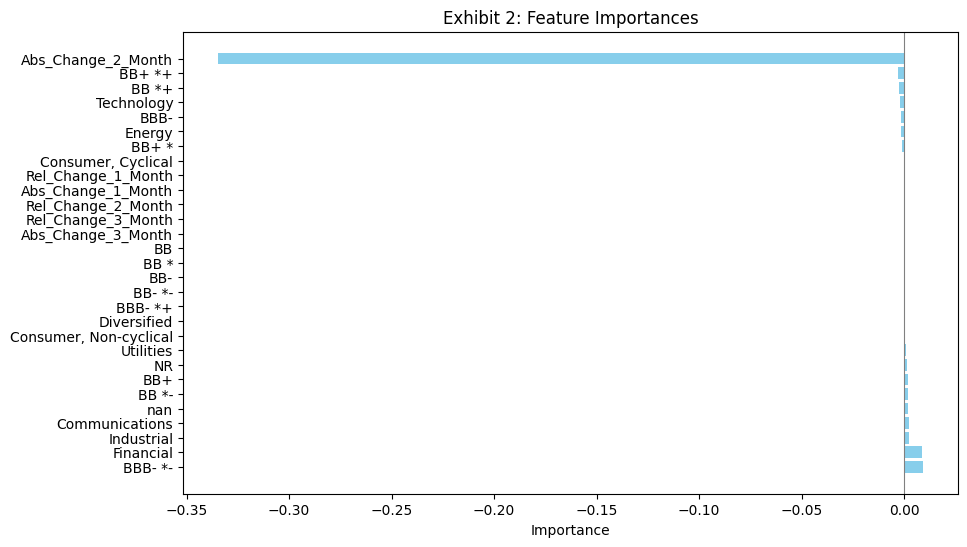

In [ ]:
import matplotlib.pyplot as plt

# Example data: replace 'features' and 'importances' with your actual data
features = np.array(oringinal_regressors.iloc[:,0])
importances = np.array(feature_importance.iloc[:,0])

features = [str(feature) for feature in features]

# Sort the features by their importance's absolute value and create symmetric values
sorted_idx = sorted(range(len(importances)), key=lambda i: importances[i])
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = [importances[i] if i % 2 == 0 else importances[i] for i in sorted_idx]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Exhibit 2: Feature Importances')
plt.axvline(x=0, color='grey', linewidth=0.8)  # Add a vertical line at x=0 for reference
plt.gca().invert_yaxis()  # To display the highest importance on top

# Display the figure
plt.show()

In [ ]:
est_OAS = lasso.predict(X)
est_OAS = pd.DataFrame({'OAS':est_OAS})

In [ ]:
est_OAS.set_index(df.index, inplace = True)
OAS_factor = y-est_OAS
OAS_factor

,OAS
2961,0.070040
2962,-0.006190
2963,0.006628
2964,0.052199
2965,0.004491
...,...
35527,0.001712
35528,0.012885
35529,0.000061
35530,-0.001687


In [ ]:
OAS_factor['Ticker'] = oas_df.Ticker.values
OAS_factor['Date'] = oas_df.Date.values
OAS_factor = OAS_factor[['Ticker', 'Date', 'OAS']]
OAS_factor

,Ticker,Date,OAS
2961,LNGFOR 3 3/8 04/13/27,2020-04-30,0.070040
2962,UBS 7 PERP,2020-04-30,-0.006190
2963,DB 4.789 PERP,2020-04-30,0.006628
2964,LNGFOR 3.95 09/16/29,2020-04-30,0.052199
2965,WDC 4 3/4 02/15/26,2020-04-30,0.004491
...,...,...,...
35527,F 3.45 02/20/25,2022-12-31,0.001712
35528,M 6.9 01/15/32_04,2022-12-31,0.012885
35529,M 8 3/4 05/15/29_04,2022-12-31,0.000061
35530,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687


## OAS Factor Backtesting
## For each month, the factor value is divided into five groups. A long-only strategy is designed for backtesting where every bond is equally weighted and the portfolio is rebalanced at the end of each month.

In [ ]:
import numpy as np


# Function to assign quintiles within each group
def assign_quintiles(df):
    df['Quintile'] = pd.qcut(df['OAS'], 5, labels=False)  # Quintiles 0 to 4
    quintile_dummies = pd.get_dummies(df['Quintile'], prefix='Quintile')
    return pd.concat([df, quintile_dummies], axis=1)

OAS_factor['Date'] = pd.to_datetime(OAS_factor['Date'])
# Group by month and apply the function to assign quintiles
OAS_signal = OAS_factor.groupby('Date').apply(assign_quintiles)
OAS_signal.reset_index(drop=True, inplace=True)
OAS_signal

<ipython-input-43-5e5755f6ea31>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  OAS_signal = OAS_factor.groupby('Date').apply(assign_quintiles)


,Ticker,Date,OAS,Quintile,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.070040,4,0,0,0,0,1
1,UBS 7 PERP,2020-04-30,-0.006190,1,0,1,0,0,0
2,DB 4.789 PERP,2020-04-30,0.006628,4,0,0,0,0,1
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,4,0,0,0,0,1
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,3,0,0,0,1,0
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,4,0,0,0,0,1
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,3,0,0,0,1,0
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,2,0,0,1,0,0


In [ ]:
index = OAS_factor.index
df_total_r = df_total_return.loc[index]

In [ ]:
df_total_r

,Ticker,Date,Total Return
2961,LNGFOR 3 3/8 04/13/27,2020/5/31,0.024764
2962,UBS 7 PERP,2020/5/31,0.008604
2963,DB 4.789 PERP,2020/5/31,0.019551
2964,LNGFOR 3.95 09/16/29,2020/5/31,0.041604
2965,WDC 4 3/4 02/15/26,2020/5/31,0.027426
...,...,...,...
35527,F 3.45 02/20/25,2023/1/31,0.014860
35528,M 6.9 01/15/32_04,2023/1/31,0.016272
35529,M 8 3/4 05/15/29_04,2023/1/31,0.052096
35530,SUN 5 7/8 03/15/28_03,2023/1/31,0.038729


In [ ]:
OAS_signal.set_index(df_total_r.index, inplace = True)
strategy = OAS_signal.loc[:, 'Quintile_0': ]
strategy['Total Return'] = df_total_r['Total Return']
strategy['Date'] = pd.to_datetime(df_total_r['Date'])
strategy

,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4,Total Return,Date
2961,0,0,0,0,1,0.024764,2020-05-31
2962,0,1,0,0,0,0.008604,2020-05-31
2963,0,0,0,0,1,0.019551,2020-05-31
2964,0,0,0,0,1,0.041604,2020-05-31
2965,0,0,0,0,1,0.027426,2020-05-31
...,...,...,...,...,...,...,...
35527,0,0,0,1,0,0.014860,2023-01-31
35528,0,0,0,0,1,0.016272,2023-01-31
35529,0,0,0,1,0,0.052096,2023-01-31
35530,0,0,1,0,0,0.038729,2023-01-31


In [ ]:
def cal_portfolio_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Total Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)

# Apply the function to each group and combine the results
portfolio_returns = strategy.groupby('Date').apply(cal_portfolio_r)

In [ ]:
portfolio_returns.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-05-31,0.033663,0.033740,0.051045,0.059652,0.034259
2020-06-30,0.017933,0.017036,0.033590,0.026339,0.034684
2020-07-31,0.030668,0.048275,0.052819,0.044155,0.023335
2020-08-31,0.006011,0.003928,0.003634,0.015457,0.019911
2020-09-30,-0.010254,-0.018275,-0.016608,-0.013274,-0.013834


In [ ]:
cum_p_return_value = (1+portfolio_returns).cumprod()-1

In [ ]:
cum_p_return_value.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-05-31,0.033663,0.033740,0.051045,0.059652,0.034259
2020-06-30,0.052200,0.051351,0.086350,0.087562,0.070131
2020-07-31,0.084469,0.102105,0.143731,0.135582,0.095103
2020-08-31,0.090987,0.106434,0.147886,0.153135,0.116908
2020-09-30,0.079800,0.086214,0.128823,0.137828,0.101457


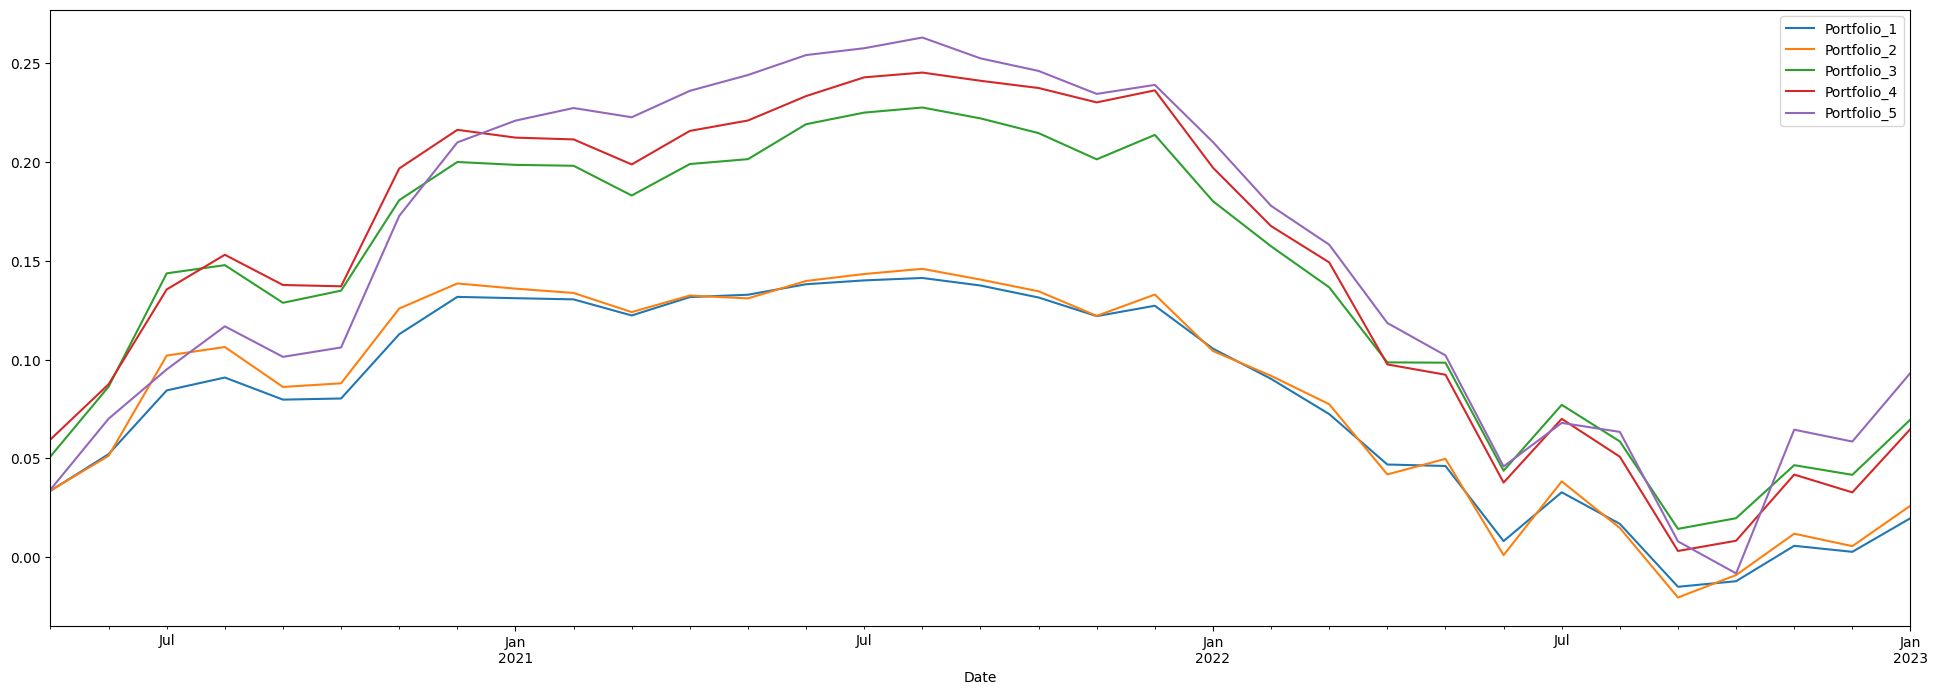

In [ ]:
import matplotlib.pyplot as plt
cum_p_return_value.plot(figsize=(24,8));

In [ ]:
index = OAS_factor.index
df_ex_r = df_excess_return.loc[index]
OAS_signal.set_index(df_ex_r.index, inplace = True)
strategy = OAS_signal.loc[:, 'Quintile_0': ]
strategy['Excess Return'] = df_ex_r['Excess Return']
strategy['Date'] = pd.to_datetime(df_ex_r['Date'])
strategy.head()

,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4,Excess Return,Date
2961,0,0,0,0,1,0.021490,2020-05-31
2962,0,1,0,0,0,0.005329,2020-05-31
2963,0,0,0,0,1,0.016276,2020-05-31
2964,0,0,0,0,1,0.038330,2020-05-31
2965,0,0,0,0,1,0.024151,2020-05-31


In [ ]:
def cal_portfolio_ex_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Excess Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)


portfolio_returns_ex = strategy.groupby('Date').apply(cal_portfolio_ex_r)

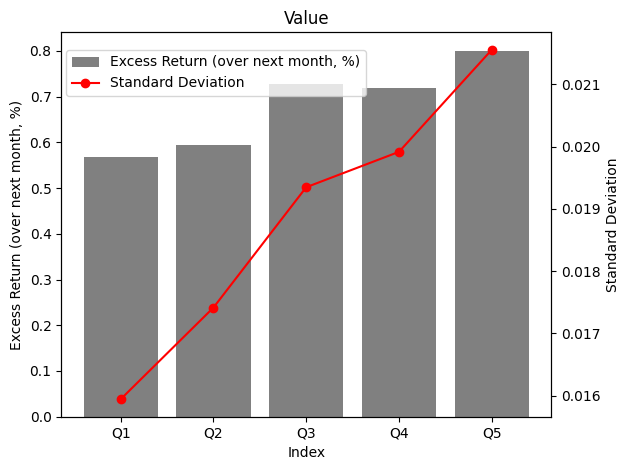

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
excess_returns = portfolio_returns.mean()*100 # Example data for excess returns
standard_deviations =  (portfolio_returns).std()# Example data for standard deviation

fig, ax1 = plt.subplots()

# Bar chart for excess returns
ax1.bar(quintiles, excess_returns, color='grey', label='Excess Return (over next month, %)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Excess Return (over next month, %)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a twin axis for the standard deviation
ax2 = ax1.twinx()
ax2.plot(quintiles, standard_deviations, color='red', marker='o', label='Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
plt.title('Value')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [ ]:
# metrices
def calculate_maximum_drawdown(df):
    # Calculate the cumulative maximum value up to each point
    rolling_max = df['Portfolio_5'].cummax()
    # Calculate drawdowns at each point
    drawdown = df['Portfolio_5'] / rolling_max - 1.0
    # Find the maximum drawdown
    max_drawdown = drawdown.min()
    return max_drawdown
calculate_maximum_drawdown(portfolio_returns_ex)

-1.7461187020055826

In [ ]:
p = cum_p_return_value['Portfolio_5']
anu_r = (p[-1] + 1)**(12/32)-1

In [ ]:
anu_std = np.sqrt(32/12)*p.std()
anu_r/anu_std

0.24485964500312332

# Momentum Factor Backtesting

In [ ]:
# Here we take excess_return for Return Index
RI = total_return

#RI = total_return # This is for total return
RI.shape

(36, 987)

In [ ]:
def calculate_momentum_facto(RI_df, M):
    current_RI = RI_df
    past_RI = RI_df.shift(M)
    MOM = current_RI / past_RI
    MOM = MOM.iloc[M:,:]
    return MOM

MOM_1m = calculate_momentum_facto(total_return, 1)
MOM_3m = calculate_momentum_facto(total_return, 3)
MOM_6m = calculate_momentum_facto(total_return, 6)
print("1-Month Momentum Factor:\n", MOM_1m.head())
print("3-Month Momentum Factor:\n", MOM_3m.head())
print("6-Month Momentum Factor:\n", MOM_6m.head())

1-Month Momentum Factor:
 Ticker      LNGFOR 3 3/8 04/13/27  UBS 7 PERP  DB 4.789 PERP  \
2020-03-31               0.244229    3.963318       5.939804   
2020-04-30               4.938238   -0.789452      -0.091885   
2020-05-31              -0.433500    0.090145       0.705449   
2020-06-30               1.289147    0.872583       4.885332   
2020-07-31               0.673512    3.154977       0.827854   

Ticker      LNGFOR 3.95 09/16/29  WDC 4 3/4 02/15/26  F 4 3/4 01/15/43  \
2020-03-31            -23.444899            0.630795          4.016701   
2020-04-30             -0.543855           -0.470464         -0.399109   
2020-05-31              0.658459            3.008119          1.293893   
2020-06-30              0.698179           -0.557130          0.307387   
2020-07-31              1.249820           -3.344519          2.719384   

Ticker      F 5.291 12/08/46  MPW 5 10/15/27  F 4.346 12/08/26  \
2020-03-31          4.990339        6.748919          6.500406   
2020-04-30  

In [ ]:
df_combined =pd.concat([MOM_1m, MOM_3m, MOM_6m], axis = 0)
df_combined.head()

Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
2020-03-31,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,6.480709,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
2020-04-30,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,-0.519440,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2020-05-31,-0.433500,0.090145,0.705449,0.658459,3.008119,1.293893,1.021931,0.255010,7.771263,0.348484,...,-0.217990,-0.562078,1.261061,2.735532,0.709282,11.265349,0.709282,0.709282,0.241618,6.502890
2020-06-30,1.289147,0.872583,4.885332,0.698179,-0.557130,0.307387,0.368576,-0.312001,0.741768,0.671447,...,0.053593,1.305891,0.555958,0.267773,0.602836,-0.007313,0.602836,0.602836,-0.289661,-0.146206
2020-07-31,0.673512,3.154977,0.827854,1.249820,-3.344519,2.719384,2.863116,-9.170930,1.163017,0.791231,...,-57.864240,0.049212,0.281382,0.867031,-7.758198,-39.756258,-11.677485,-4.900809,-2.720458,-1.740205


In [ ]:
df_combined.reset_index(inplace = True)
df_combined.rename(columns = {df_combined.columns[0]: 'Date'}, inplace = True)
df_combined.head()

Ticker,Date,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
0,2020-03-31,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
1,2020-04-30,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2,2020-05-31,-0.433500,0.090145,0.705449,0.658459,3.008119,1.293893,1.021931,0.255010,7.771263,...,-0.217990,-0.562078,1.261061,2.735532,0.709282,11.265349,0.709282,0.709282,0.241618,6.502890
3,2020-06-30,1.289147,0.872583,4.885332,0.698179,-0.557130,0.307387,0.368576,-0.312001,0.741768,...,0.053593,1.305891,0.555958,0.267773,0.602836,-0.007313,0.602836,0.602836,-0.289661,-0.146206
4,2020-07-31,0.673512,3.154977,0.827854,1.249820,-3.344519,2.719384,2.863116,-9.170930,1.163017,...,-57.864240,0.049212,0.281382,0.867031,-7.758198,-39.756258,-11.677485,-4.900809,-2.720458,-1.740205


In [ ]:
MoM_average = df_combined.groupby('Date').mean()
MoM_average

Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,6.480709,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
2020-04-30,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,-0.519440,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2020-05-31,-0.478163,-0.095953,0.160216,4.527116,1.057705,-0.390176,-0.555443,-0.516717,2.428169,-0.412316,...,-43.217469,-3.344494,-11.192525,0.179550,-0.788692,5.489993,-0.788692,-0.788692,-2.987455,1.253787
2020-06-30,-0.735281,0.405243,2.284332,0.224078,0.115663,0.074325,0.105525,-0.126218,0.204571,0.274952,...,0.041308,0.091628,0.202069,0.051813,0.233894,-3.656146,0.233894,0.233894,-0.112611,0.068640
2020-07-31,0.148562,1.701572,1.840466,0.912195,1.130303,1.900476,1.970767,-4.220630,3.933600,0.488185,...,-28.594112,0.006545,0.239329,0.751066,-5.537725,-18.240596,-8.335274,-3.498149,-1.265030,-0.042844
2020-08-31,0.051589,0.719559,0.603026,-0.900857,-0.056524,0.003094,0.002102,-0.020403,0.038410,0.546910,...,-57.006412,-0.180665,-7.972963,0.152218,-1.068121,-0.245837,-1.364590,-0.977944,-0.098589,0.005457
2020-09-30,-0.160949,-0.878792,-0.313764,-0.069682,-0.049138,-0.717550,1.168040,1.211729,0.268311,-1.117065,...,5.076574,1.143705,0.009544,-0.214943,0.243564,-56.911301,-1.551826,-0.479835,-1.152736,-0.745711
2020-10-31,0.885258,-0.032973,0.129654,-0.720458,-1.939074,-0.106146,-0.056673,-0.007574,0.197075,0.412274,...,-0.088081,0.433875,-3.483289,-0.094778,-1.999136,-8.030780,0.097814,0.253020,-0.067237,-0.050409
2020-11-30,0.749984,2.152098,4.897532,-1.860486,-1.963463,3.963303,0.896535,7.172172,-0.238614,1.500718,...,1.226983,-1.516833,-0.921786,1.456284,1.751398,-0.617140,3.903703,0.388639,4.469446,4.361069


In [ ]:
(df_combined.isna().sum()).sum()

970

In [ ]:
 MoM_average_shift = MoM_average.shift(1)
 MoM_average_shift = MoM_average_shift.iloc[1:]
 MoM_average_shift

Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,6.480709,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
2020-05-31,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,-0.519440,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2020-06-30,-0.478163,-0.095953,0.160216,4.527116,1.057705,-0.390176,-0.555443,-0.516717,2.428169,-0.412316,...,-43.217469,-3.344494,-11.192525,0.179550,-0.788692,5.489993,-0.788692,-0.788692,-2.987455,1.253787
2020-07-31,-0.735281,0.405243,2.284332,0.224078,0.115663,0.074325,0.105525,-0.126218,0.204571,0.274952,...,0.041308,0.091628,0.202069,0.051813,0.233894,-3.656146,0.233894,0.233894,-0.112611,0.068640
2020-08-31,0.148562,1.701572,1.840466,0.912195,1.130303,1.900476,1.970767,-4.220630,3.933600,0.488185,...,-28.594112,0.006545,0.239329,0.751066,-5.537725,-18.240596,-8.335274,-3.498149,-1.265030,-0.042844
2020-09-30,0.051589,0.719559,0.603026,-0.900857,-0.056524,0.003094,0.002102,-0.020403,0.038410,0.546910,...,-57.006412,-0.180665,-7.972963,0.152218,-1.068121,-0.245837,-1.364590,-0.977944,-0.098589,0.005457
2020-10-31,-0.160949,-0.878792,-0.313764,-0.069682,-0.049138,-0.717550,1.168040,1.211729,0.268311,-1.117065,...,5.076574,1.143705,0.009544,-0.214943,0.243564,-56.911301,-1.551826,-0.479835,-1.152736,-0.745711
2020-11-30,0.885258,-0.032973,0.129654,-0.720458,-1.939074,-0.106146,-0.056673,-0.007574,0.197075,0.412274,...,-0.088081,0.433875,-3.483289,-0.094778,-1.999136,-8.030780,0.097814,0.253020,-0.067237,-0.050409
2020-12-31,0.749984,2.152098,4.897532,-1.860486,-1.963463,3.963303,0.896535,7.172172,-0.238614,1.500718,...,1.226983,-1.516833,-0.921786,1.456284,1.751398,-0.617140,3.903703,0.388639,4.469446,4.361069


In [ ]:
df_long = pd.melt(MoM_average_shift.reset_index(), id_vars = ['Date'], value_name='MoM')

df_final = df_long.sort_values(by = 'Date', ignore_index = True)

In [ ]:
df_final.loc[df_final.MoM == df_final.MoM.min(), 'MoM'] = -53464.087119
df_final.loc[df_final.MoM == df_final.MoM.max(), 'MoM'] = 59586.679530
df_final.describe()

,MoM
count,33068.000000
mean,70.920826
std,4196.378464
min,-53464.087119
25%,-0.693971
50%,0.005031
75%,0.979572
max,59586.679530


In [ ]:
def assign_quintiles_MoM(df):
    df['Quintile'] = pd.qcut(df['MoM'], 5, labels=False)  # Quintiles 0 to 4
    quintile_dummies = pd.get_dummies(df['Quintile'], prefix='Quintile')
    quintile_dummies.columns = [col.split(".")[0] for col in quintile_dummies.columns]
    return pd.concat([df, quintile_dummies.astype(int)], axis=1)

MOM_avg_final = df_final.groupby('Date').apply(assign_quintiles_MoM)
MOM_avg_final

<ipython-input-75-949829ae733f>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  MOM_avg_final = df_final.groupby('Date').apply(assign_quintiles_MoM)


,Date,Ticker,MoM,Quintile,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4
0,2020-04-30,LNGFOR 3 3/8 04/13/27,0.244229,1.0,0,1,0,0,0
1,2020-04-30,NRG 5 1/4 06/15/29,0.303425,1.0,0,1,0,0,0
2,2020-04-30,DAR 5 1/4 04/15/27,7.092795,2.0,0,0,1,0,0
3,2020-04-30,F 6 5/8 10/01/28,15.221828,4.0,0,0,0,0,1
4,2020-04-30,F 4.05 06/20/27,25.858343,4.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
33553,2023-01-31,CCK 4 3/4 02/01/26_02,0.092339,3.0,0,0,0,1,0
33554,2023-01-31,NRG 5 3/4 01/15/28,-0.303507,0.0,1,0,0,0,0
33555,2023-01-31,IGT 6 1/4 01/15/27_02,-0.026825,1.0,0,1,0,0,0
33556,2023-01-31,BBLTB 3.733 09/25/34_02,-0.143397,1.0,0,1,0,0,0


In [ ]:
start = 987*2
df_total_return.iloc[start:].sort_values(by = ['Date', 'Ticker'])

,Ticker,Date,Total Return
8149,AA 5 1/2 12/15/27,2020/10/31,0.017937
8223,AA 5 1/2 12/15/27_02,2020/10/31,0.019916
8198,AA 6 1/8 05/15/28,2020/10/31,0.023240
8369,AA 6 1/8 05/15/28_02,2020/10/31,0.021035
8342,AAL 3 3/4 10/15/25,2020/10/31,-0.012635
...,...,...,...
35255,WOORIB 4 1/4 PERP_02,2023/1/31,0.016563
34839,YUM 4 3/4 06/01/27,2023/1/31,0.007598
35117,YUM 4 3/4 06/01/27_02,2023/1/31,0.010231
34938,ZFFNGR 4 3/4 04/29/25,2023/1/31,0.026635


In [ ]:
MoM_signal = MOM_avg_final.sort_values(by = ['Date', 'Ticker'], ignore_index = True)
MoM_signal['Total Return'] = df_total_return.iloc[start:].sort_values(by = ['Date', 'Ticker'],
                                                                      ignore_index = True)['Total Return']
MoM_signal

,Date,Ticker,MoM,Quintile,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4,Total Return
0,2020-04-30,AA 5 1/2 12/15/27,10.207427,3.0,0,0,0,1,0,0.017937
1,2020-04-30,AA 5 1/2 12/15/27_02,10.207427,3.0,0,0,0,1,0,0.019916
2,2020-04-30,AA 6 1/8 05/15/28,4.819347,2.0,0,0,1,0,0,0.023240
3,2020-04-30,AA 6 1/8 05/15/28_02,6.751524,2.0,0,0,1,0,0,0.021035
4,2020-04-30,AAL 3 3/4 10/15/25,-28.738242,0.0,1,0,0,0,0,-0.012635
...,...,...,...,...,...,...,...,...,...,...
33553,2023-01-31,WOORIB 4 1/4 PERP_02,-0.679972,0.0,1,0,0,0,0,0.016563
33554,2023-01-31,YUM 4 3/4 06/01/27,0.005008,2.0,0,0,1,0,0,0.007598
33555,2023-01-31,YUM 4 3/4 06/01/27_02,-0.006007,2.0,0,0,1,0,0,0.010231
33556,2023-01-31,ZFFNGR 4 3/4 04/29/25,0.079334,3.0,0,0,0,1,0,0.026635


In [ ]:
def cal_portfolio_MOM(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Total Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)

# Apply the function to each group and combine the results

portfolio_MOM = MoM_signal.groupby('Date').apply(cal_portfolio_MOM)
portfolio_MOM.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-04-30,0.004364,0.000249,0.003998,-0.002343,0.005161
2020-05-31,0.040172,0.040307,0.048046,0.042080,0.045874
2020-06-30,0.025916,0.016095,0.011431,0.019546,0.019114
2020-07-31,0.076596,0.069396,0.063256,0.063090,0.057381
2020-08-31,0.050590,0.049542,0.037969,0.039562,0.035485


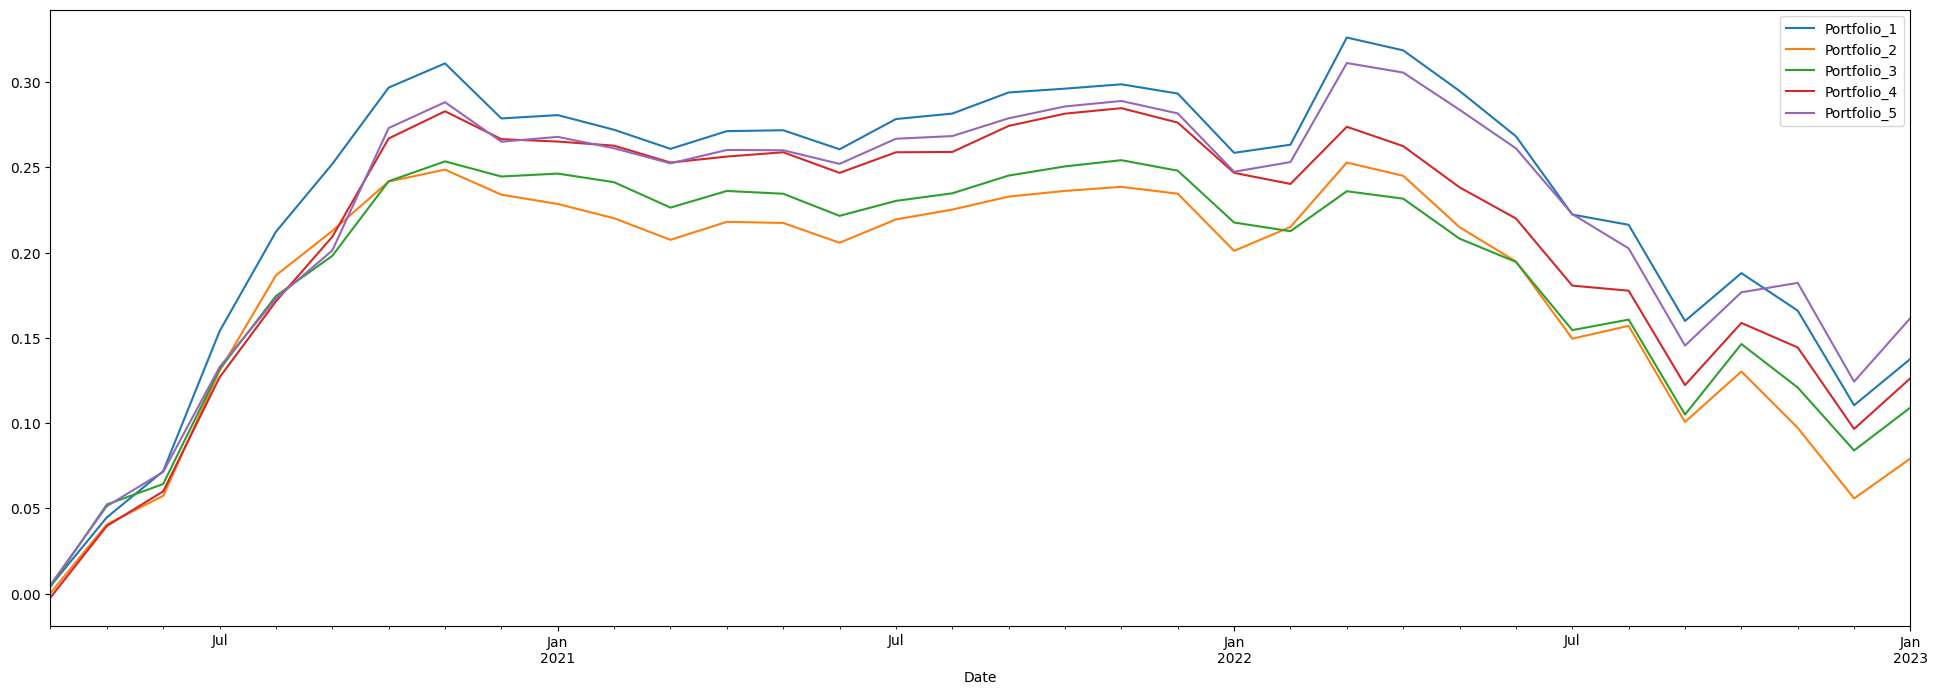

In [ ]:
cum_MOMp_return = (1+portfolio_MOM).cumprod()-1
cum_MOMp_return.plot(figsize=(24,8));

In [ ]:
df = df_total_return.iloc[start:].sort_values(by = ['Date', 'Ticker'],ignore_index = True)
(df['Ticker'] == MoM_signal['Ticker']).sum()

33558

In [ ]:
MoM_signal['Excess Return'] = df_excess_return.iloc[start:].sort_values(by = ['Date', 'Ticker'],
                                                                      ignore_index = True)['Excess Return']
def cal_MOMportfolio_ex_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Excess Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)


portfolio_excess_returns = MoM_signal.groupby('Date').apply(cal_MOMportfolio_ex_r)
portfolio_excess_returns.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-04-30,0.035155,0.017175,0.088347,0.070355,0.101060
2020-05-31,0.010591,0.038511,0.048057,0.064376,0.039826
2020-06-30,0.031161,0.028360,0.015471,0.019323,0.029930
2020-07-31,0.035559,0.035483,0.040527,0.021907,0.026033
2020-08-31,0.024195,0.026837,0.021327,0.007302,0.019110


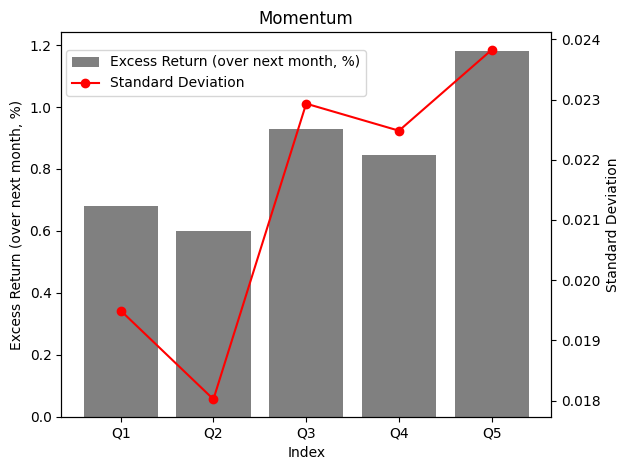

In [ ]:
# Sample data
quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
excess_returns = portfolio_excess_returns.mean()*100 # Example data for excess returns
standard_deviations =  (portfolio_excess_returns).std()# Example data for standard deviation

fig, ax1 = plt.subplots()

# Bar chart for excess returns
ax1.bar(quintiles, excess_returns, color='grey', label='Excess Return (over next month, %)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Excess Return (over next month, %)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a twin axis for the standard deviation
ax2 = ax1.twinx()
ax2.plot(quintiles, standard_deviations, color='red', marker='o', label='Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
plt.title('Momentum')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [ ]:
calculate_maximum_drawdown(portfolio_excess_returns*100)

-1.317386171679551

# Carry Factor Backtesting

In [ ]:
carry_df = oas.reset_index()
carry_df = pd.melt(carry_df, id_vars=['Ticker'], value_name='Carry')
carry_df.rename(columns = {carry_df.columns[1]: 'Date'}, inplace = True)
carry_df

,Ticker,Date,Carry
0,LNGFOR 3 3/8 04/13/27,2020/1/31,19.748442
1,UBS 7 PERP,2020/1/31,2.820155
2,DB 4.789 PERP,2020/1/31,5.666190
3,LNGFOR 3.95 09/16/29,2020/1/31,15.857319
4,WDC 4 3/4 02/15/26,2020/1/31,2.829587
...,...,...,...
35527,F 3.45 02/20/25,2022/12/31,2.408543
35528,M 6.9 01/15/32_04,2022/12/31,5.474554
35529,M 8 3/4 05/15/29_04,2022/12/31,2.704872
35530,SUN 5 7/8 03/15/28_03,2022/12/31,1.696749


In [ ]:
# Function to assign quintiles within each group
def assign_quintiles(df):
    df['Quintile'] = pd.qcut(df['Carry'], 5, labels=False)  # Quintiles 0 to 4
    quintile_dummies = pd.get_dummies(df['Quintile'], prefix='Quintile')
    return pd.concat([df, quintile_dummies], axis=1)

oas_df['Date'] = pd.to_datetime(oas_df['Date'])

# Group by month and apply the function to assign quintiles
Carry_signal = carry_df.groupby('Date').apply(assign_quintiles)
Carry_signal.reset_index(drop=True, inplace=True)

Carry_signal

<ipython-input-76-cc198e6c0239>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Carry_signal = carry_df.groupby('Date').apply(assign_quintiles)


,Ticker,Date,Carry,Quintile,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4
0,LNGFOR 3 3/8 04/13/27,2020/1/31,19.748442,4,0,0,0,0,1
1,UBS 7 PERP,2020/1/31,2.820155,3,0,0,0,1,0
2,DB 4.789 PERP,2020/1/31,5.666190,4,0,0,0,0,1
3,LNGFOR 3.95 09/16/29,2020/1/31,15.857319,4,0,0,0,0,1
4,WDC 4 3/4 02/15/26,2020/1/31,2.829587,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
35527,F 3.45 02/20/25,2022/12/31,2.408543,2,0,0,1,0,0
35528,M 6.9 01/15/32_04,2022/12/31,5.474554,4,0,0,0,0,1
35529,M 8 3/4 05/15/29_04,2022/12/31,2.704872,2,0,0,1,0,0
35530,SUN 5 7/8 03/15/28_03,2022/12/31,1.696749,1,0,1,0,0,0


In [ ]:
df_total_return

,Ticker,Date,Total Return
0,LNGFOR 3 3/8 04/13/27,2020/2/29,-0.047366
1,UBS 7 PERP,2020/2/29,-0.030505
2,DB 4.789 PERP,2020/2/29,-0.050778
3,LNGFOR 3.95 09/16/29,2020/2/29,0.004955
4,WDC 4 3/4 02/15/26,2020/2/29,-0.030722
...,...,...,...
35527,F 3.45 02/20/25,2023/1/31,0.014860
35528,M 6.9 01/15/32_04,2023/1/31,0.016272
35529,M 8 3/4 05/15/29_04,2023/1/31,0.052096
35530,SUN 5 7/8 03/15/28_03,2023/1/31,0.038729


In [ ]:
#Carry_signal.set_index(df_total_r.index, inplace = True)
strategy_Carry = Carry_signal.loc[:, 'Quintile_0': ]
strategy_Carry['Total Return'] = df_total_return['Total Return']
strategy_Carry['Date'] = pd.to_datetime(df_total_return['Date'])

strategy_Carry

,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4,Total Return,Date
0,0,0,0,0,1,-0.047366,2020-02-29
1,0,0,0,1,0,-0.030505,2020-02-29
2,0,0,0,0,1,-0.050778,2020-02-29
3,0,0,0,0,1,0.004955,2020-02-29
4,0,0,0,1,0,-0.030722,2020-02-29
...,...,...,...,...,...,...,...
35527,0,0,1,0,0,0.014860,2023-01-31
35528,0,0,0,0,1,0.016272,2023-01-31
35529,0,0,1,0,0,0.052096,2023-01-31
35530,0,1,0,0,0,0.038729,2023-01-31


In [ ]:
def cal_portfolio_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Total Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)

# Apply the function to each group and combine the results
portfolio_returns_Carry = strategy_Carry.groupby('Date').apply(cal_portfolio_r)

portfolio_returns_Carry.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-02-29,-0.018841,-0.019635,-0.014562,-0.015372,-0.013725
2020-03-31,-0.136507,-0.166179,-0.180528,-0.181972,-0.169202
2020-04-30,0.082063,0.070519,0.073964,0.049871,0.048966
2020-05-31,0.035628,0.051904,0.050907,0.047425,0.026525
2020-06-30,0.012139,0.022161,0.031241,0.032593,0.031492


In [ ]:
cum_p_return_Carry = (1 + portfolio_returns_Carry).cumprod()-1

In [ ]:
cum_p_return_Carry.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-02-29,-0.018841,-0.019635,-0.014562,-0.015372,-0.013725
2020-03-31,-0.152776,-0.182551,-0.192461,-0.194546,-0.180605
2020-04-30,-0.083250,-0.124906,-0.132732,-0.154377,-0.140482
2020-05-31,-0.050588,-0.079485,-0.088583,-0.114273,-0.117683
2020-06-30,-0.039063,-0.059085,-0.060109,-0.085404,-0.089898


<Axes: xlabel='Date'>

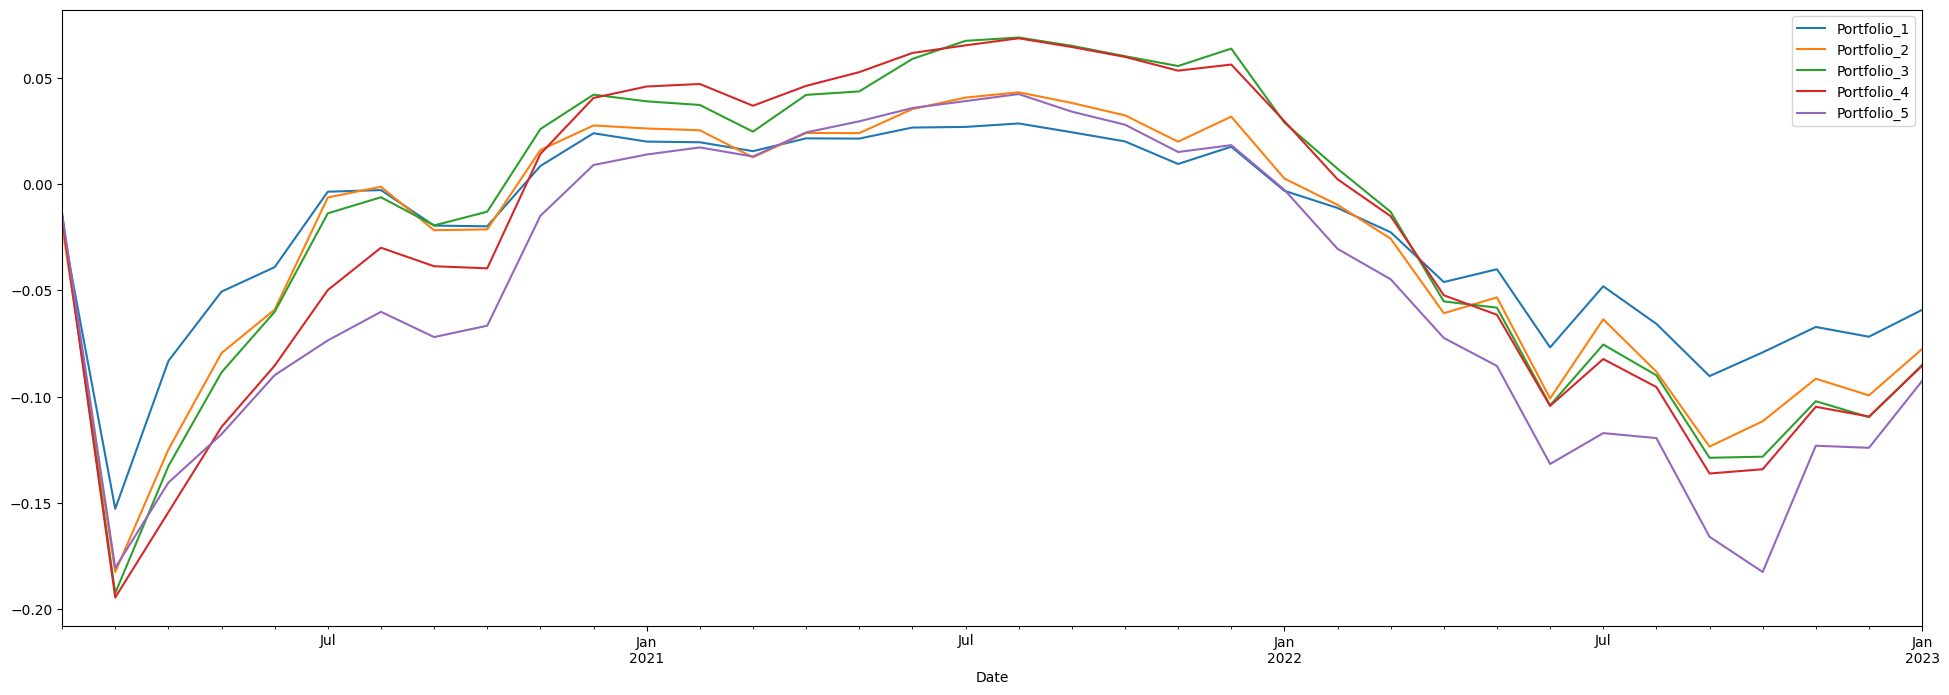

In [ ]:
cum_p_return_Carry.plot(figsize=(24,8))

In [ ]:
strategy_Carry = Carry_signal.loc[:, 'Quintile_0': ]
strategy_Carry['Excess Return'] = df_excess_return['Excess Return']
strategy_Carry['Date'] = pd.to_datetime(df_excess_return['Date'])
strategy_Carry.head()

,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4,Excess Return,Date
0,0,0,0,0,1,-0.076983,2020-02-29
1,0,0,0,1,0,-0.060122,2020-02-29
2,0,0,0,0,1,-0.080395,2020-02-29
3,0,0,0,0,1,-0.024662,2020-02-29
4,0,0,0,1,0,-0.060339,2020-02-29


In [ ]:
def cal_portfolio_ex_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Excess Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)


portfolio_returns_Carry = strategy_Carry.groupby('Date').apply(cal_portfolio_ex_r)

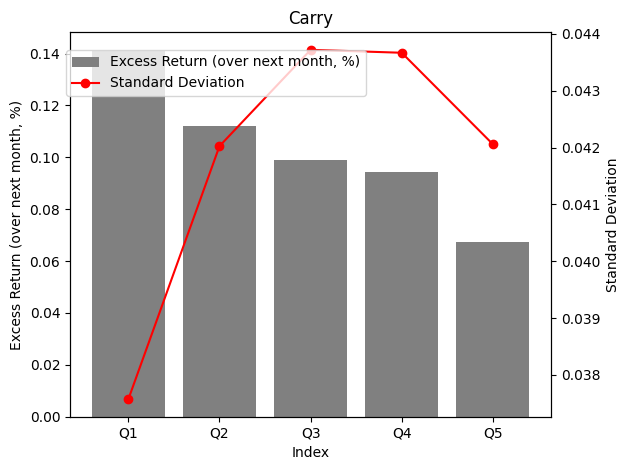

In [ ]:
# Sample data
quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
excess_returns = portfolio_returns_Carry.mean()*100 # Example data for excess returns
standard_deviations =  (portfolio_returns_Carry).std()# Example data for standard deviation

fig, ax1 = plt.subplots()

# Bar chart for excess returns
ax1.bar(quintiles, excess_returns, color='grey', label='Excess Return (over next month, %)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Excess Return (over next month, %)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a twin axis for the standard deviation
ax2 = ax1.twinx()
ax2.plot(quintiles, standard_deviations, color='red', marker='o', label='Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
plt.title('Carry')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [ ]:
calculate_maximum_drawdown(portfolio_returns_Carry*100)

-1.8041033757416938

# Multifactor

In [ ]:
# 4. Multifactor

oas_reset = OAS_factor.reset_index(drop=True)
oas_reset['Order'] = pd.factorize(oas_reset['Ticker'])[0]
oas_reset

,Ticker,Date,OAS,Order
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.070040,0
1,UBS 7 PERP,2020-04-30,-0.006190,1
2,DB 4.789 PERP,2020-04-30,0.006628,2
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,3
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4
...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,982
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,983
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,984
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,985


In [ ]:
# We now have 2. momentum:
MoM_average.head()

Ticker,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,BACR 8 PERP_02,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,6.480709,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
2020-04-30,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,-0.519440,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2020-05-31,-0.478163,-0.095953,0.160216,4.527116,1.057705,-0.390176,-0.555443,-0.516717,2.428169,-0.412316,...,-43.217469,-3.344494,-11.192525,0.179550,-0.788692,5.489993,-0.788692,-0.788692,-2.987455,1.253787
2020-06-30,-0.735281,0.405243,2.284332,0.224078,0.115663,0.074325,0.105525,-0.126218,0.204571,0.274952,...,0.041308,0.091628,0.202069,0.051813,0.233894,-3.656146,0.233894,0.233894,-0.112611,0.068640
2020-07-31,0.148562,1.701572,1.840466,0.912195,1.130303,1.900476,1.970767,-4.220630,3.933600,0.488185,...,-28.594112,0.006545,0.239329,0.751066,-5.537725,-18.240596,-8.335274,-3.498149,-1.265030,-0.042844


In [ ]:
MoM_average_final = MoM_average.reset_index()
MoM_average_final.head()

Ticker,Date,LNGFOR 3 3/8 04/13/27,UBS 7 PERP,DB 4.789 PERP,LNGFOR 3.95 09/16/29,WDC 4 3/4 02/15/26,F 4 3/4 01/15/43,F 5.291 12/08/46,MPW 5 10/15/27,F 4.346 12/08/26,...,CHTR 5 3/8 05/01/47_03,F 3.85 09/20/27_02,F 3 1/4 09/20/26,MHO 4.95 02/01/28_03,M 7 7/8 03/01/30_04,F 3.45 02/20/25,M 6.9 01/15/32_04,M 8 3/4 05/15/29_04,SUN 5 7/8 03/15/28_03,HILCRP 6 1/4 11/01/28_03
0,2020-03-31,0.244229,3.963318,5.939804,-23.444899,0.630795,4.016701,4.990339,6.748919,6.500406,...,-159.205408,7.127054,86.591025,3.876681,10.207427,-0.000286,10.207427,10.207427,27.944158,2.060558
1,2020-04-30,4.938238,-0.789452,-0.091885,-0.543855,-0.470464,-0.399109,-0.418217,-0.748641,-0.057703,...,-2.484262,1.529449,-0.216546,-0.224090,-0.315840,88.675659,-0.315840,-0.315840,-0.920720,-0.298167
2,2020-05-31,-0.478163,-0.095953,0.160216,4.527116,1.057705,-0.390176,-0.555443,-0.516717,2.428169,...,-43.217469,-3.344494,-11.192525,0.179550,-0.788692,5.489993,-0.788692,-0.788692,-2.987455,1.253787
3,2020-06-30,-0.735281,0.405243,2.284332,0.224078,0.115663,0.074325,0.105525,-0.126218,0.204571,...,0.041308,0.091628,0.202069,0.051813,0.233894,-3.656146,0.233894,0.233894,-0.112611,0.068640
4,2020-07-31,0.148562,1.701572,1.840466,0.912195,1.130303,1.900476,1.970767,-4.220630,3.933600,...,-28.594112,0.006545,0.239329,0.751066,-5.537725,-18.240596,-8.335274,-3.498149,-1.265030,-0.042844


In [ ]:
MoM_melt =  MoM_average_final.melt(id_vars='Date', var_name='Ticker', value_name='MoM')
MoM_melt

,Date,Ticker,MoM
0,2020-03-31,LNGFOR 3 3/8 04/13/27,0.244229
1,2020-04-30,LNGFOR 3 3/8 04/13/27,4.938238
2,2020-05-31,LNGFOR 3 3/8 04/13/27,-0.478163
3,2020-06-30,LNGFOR 3 3/8 04/13/27,-0.735281
4,2020-07-31,LNGFOR 3 3/8 04/13/27,0.148562
...,...,...,...
34540,2022-09-30,HILCRP 6 1/4 11/01/28_03,2.655913
34541,2022-10-31,HILCRP 6 1/4 11/01/28_03,-0.349579
34542,2022-11-30,HILCRP 6 1/4 11/01/28_03,0.253451
34543,2022-12-31,HILCRP 6 1/4 11/01/28_03,0.100230


In [ ]:
MoM_melt_filter = MoM_melt[(MoM_melt['Date'] > '2020-03-31') & (MoM_melt['Date'] < '2023-01-31')]
MoM_melt_filter
MoM_melt_filter.reset_index()

,index,Date,Ticker,MoM
0,1,2020-04-30,LNGFOR 3 3/8 04/13/27,4.938238
1,2,2020-05-31,LNGFOR 3 3/8 04/13/27,-0.478163
2,3,2020-06-30,LNGFOR 3 3/8 04/13/27,-0.735281
3,4,2020-07-31,LNGFOR 3 3/8 04/13/27,0.148562
4,5,2020-08-31,LNGFOR 3 3/8 04/13/27,0.051589
...,...,...,...,...
32566,34539,2022-08-31,HILCRP 6 1/4 11/01/28_03,-0.100772
32567,34540,2022-09-30,HILCRP 6 1/4 11/01/28_03,2.655913
32568,34541,2022-10-31,HILCRP 6 1/4 11/01/28_03,-0.349579
32569,34542,2022-11-30,HILCRP 6 1/4 11/01/28_03,0.253451


In [ ]:
MoM_melt_filter.isna().sum()

Date        0
Ticker      0
MoM       489
dtype: int64

In [ ]:
grouped = MoM_melt_filter.sort_values(by=['Date'])
grouped_df = grouped.reset_index(drop=True)
grouped_df

,Date,Ticker,MoM
0,2020-04-30,LNGFOR 3 3/8 04/13/27,4.938238
1,2020-04-30,HASI 3 3/4 09/15/30_02,-0.315840
2,2020-04-30,PRUPAR 7 1/2 12/31/31_02,-0.008985
3,2020-04-30,ET 6 3/4 PERP,-0.741647
4,2020-04-30,TXT Float 02/15/42_02,-0.405707
...,...,...,...
32566,2022-12-31,TGNA 4 5/8 03/15/28,-0.173875
32567,2022-12-31,ACI 3 1/4 03/15/26,0.029155
32568,2022-12-31,USIM 5 7/8 07/18/26_02,0.881046
32569,2022-12-31,TWX 6 5/8 05/15/29,NaN


In [ ]:
# Then we have 3.Carry
carry_multi = oas_df.iloc[:,0:3]
#carry_multi['OAS'] = 1/carry_multi['OAS']
carry_multi_final = carry_multi.reset_index(drop=True)
carry_multi_final=carry_multi_final.rename(columns={'OAS':'Carry'})
carry_multi_final['Date'] = pd.to_datetime(carry_multi_final['Date'], format='%Y%m%d')

carry_multi_final

,Ticker,Date,Carry
0,LNGFOR 3 3/8 04/13/27,2020-04-30,19.711042
1,UBS 7 PERP,2020-04-30,2.897535
2,DB 4.789 PERP,2020-04-30,5.667446
3,LNGFOR 3.95 09/16/29,2020-04-30,15.857296
4,WDC 4 3/4 02/15/26,2020-04-30,2.922350
...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,2.408543
32567,M 6.9 01/15/32_04,2022-12-31,5.474554
32568,M 8 3/4 05/15/29_04,2022-12-31,2.704872
32569,SUN 5 7/8 03/15/28_03,2022-12-31,1.696749


In [ ]:
combined_df = pd.concat([oas_reset,grouped_df,carry_multi_final],axis=1)
combined_df

,Ticker,Date,OAS,Order,Date,Ticker,MoM,Ticker,Date,Carry
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.070040,0,2020-04-30,LNGFOR 3 3/8 04/13/27,4.938238,LNGFOR 3 3/8 04/13/27,2020-04-30,19.711042
1,UBS 7 PERP,2020-04-30,-0.006190,1,2020-04-30,HASI 3 3/4 09/15/30_02,-0.315840,UBS 7 PERP,2020-04-30,2.897535
2,DB 4.789 PERP,2020-04-30,0.006628,2,2020-04-30,PRUPAR 7 1/2 12/31/31_02,-0.008985,DB 4.789 PERP,2020-04-30,5.667446
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,3,2020-04-30,ET 6 3/4 PERP,-0.741647,LNGFOR 3.95 09/16/29,2020-04-30,15.857296
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4,2020-04-30,TXT Float 02/15/42_02,-0.405707,WDC 4 3/4 02/15/26,2020-04-30,2.922350
...,...,...,...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,982,2022-12-31,TGNA 4 5/8 03/15/28,-0.173875,F 3.45 02/20/25,2022-12-31,2.408543
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,983,2022-12-31,ACI 3 1/4 03/15/26,0.029155,M 6.9 01/15/32_04,2022-12-31,5.474554
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,984,2022-12-31,USIM 5 7/8 07/18/26_02,0.881046,M 8 3/4 05/15/29_04,2022-12-31,2.704872
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,985,2022-12-31,TWX 6 5/8 05/15/29,NaN,SUN 5 7/8 03/15/28_03,2022-12-31,1.696749


In [ ]:
combined_df = combined_df.T.drop_duplicates().T
combined_df

,Ticker,Date,OAS,Order,Ticker,MoM,Carry
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.07004,0,LNGFOR 3 3/8 04/13/27,4.938238,19.711042
1,UBS 7 PERP,2020-04-30,-0.00619,1,HASI 3 3/4 09/15/30_02,-0.31584,2.897535
2,DB 4.789 PERP,2020-04-30,0.006628,2,PRUPAR 7 1/2 12/31/31_02,-0.008985,5.667446
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,3,ET 6 3/4 PERP,-0.741647,15.857296
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4,TXT Float 02/15/42_02,-0.405707,2.92235
...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,982,TGNA 4 5/8 03/15/28,-0.173875,2.408543
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,983,ACI 3 1/4 03/15/26,0.029155,5.474554
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,984,USIM 5 7/8 07/18/26_02,0.881046,2.704872
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,985,TWX 6 5/8 05/15/29,NaN,1.696749


In [ ]:
combined_df.isna().sum()

Ticker      0
Date        0
OAS         0
Order       0
Date        0
Ticker      0
MoM       489
Ticker      0
Date        0
Carry       0
dtype: int64

In [ ]:
# If combined_df is a slice from another DataFrame, make sure to copy it to avoid the SettingWithCopyWarning.
combined_df = combined_df.copy()

# Replace inf/-inf with NaN
combined_df['MoM'] = combined_df['MoM'].replace([np.inf, -np.inf], np.nan)

# Convert all entries to numeric, coercing errors to NaN
combined_df['MoM'] = pd.to_numeric(combined_df['MoM'], errors='coerce')

# Calculate the mean excluding NaN and infinite values
mom_mean = combined_df['MoM'].mean(skipna=True)

# Fill NaN values with the calculated mean
combined_df['MoM'].fillna(mom_mean, inplace=True)

# Verify if the NaN and infinite values have been addressed
nan_count = combined_df['MoM'].isna().sum()
inf_count = np.isinf(combined_df['MoM']).sum()

print(f"NaN count in 'MoM': {nan_count}")
print(f"Infinite count in 'MoM': {inf_count}")

combined_df['MoM'] = combined_df['MoM'].replace([np.inf, -np.inf], np.nan)

combined_df['MoM'] = pd.to_numeric(combined_df['MoM'], errors='coerce')

print("NaN count before mean calculation:", combined_df['MoM'].isna().sum())

mom_mean = combined_df['MoM'].mean(skipna=True)

print("Mean value calculated:", mom_mean)

combined_df['MoM'] = combined_df['MoM'].fillna(mom_mean)

print("NaN count after fillna:", combined_df['MoM'].isna().sum())
combined_df

NaN count in 'MoM': 0
Infinite count in 'MoM': 0
NaN count before mean calculation: 0
Mean value calculated: -0.20178273937257055
NaN count after fillna: 0


,Ticker,Date,OAS,Order,Ticker,MoM,Carry
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.07004,0,LNGFOR 3 3/8 04/13/27,4.938238,19.711042
1,UBS 7 PERP,2020-04-30,-0.00619,1,HASI 3 3/4 09/15/30_02,-0.315840,2.897535
2,DB 4.789 PERP,2020-04-30,0.006628,2,PRUPAR 7 1/2 12/31/31_02,-0.008985,5.667446
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,3,ET 6 3/4 PERP,-0.741647,15.857296
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4,TXT Float 02/15/42_02,-0.405707,2.92235
...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,982,TGNA 4 5/8 03/15/28,-0.173875,2.408543
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,983,ACI 3 1/4 03/15/26,0.029155,5.474554
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,984,USIM 5 7/8 07/18/26_02,0.881046,2.704872
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,985,TWX 6 5/8 05/15/29,-0.201783,1.696749


In [ ]:
for factor in ['OAS', 'MoM','Carry']:
  range = combined_df[factor].max() - combined_df[factor].min()
  combined_df[f'{factor}_z'] = (combined_df[factor] - combined_df[factor].min()) / range

#combined_df['Score'] = combined_df[['OAS_z', 'MoM_z','Carry_z']].mean(axis = 1)
combined_df['Score'] = 0.3*combined_df['OAS_z'] + 0.6*combined_df['MoM_z']+ 0.1*combined_df['Carry_z']
combined_df

,Ticker,Date,OAS,Order,Ticker,MoM,Carry,OAS_z,MoM_z,Carry_z,Score
0,LNGFOR 3 3/8 04/13/27,2020-04-30,0.07004,0,LNGFOR 3 3/8 04/13/27,4.938238,19.711042,0.180276,0.472965,0.169633,0.354825
1,UBS 7 PERP,2020-04-30,-0.00619,1,HASI 3 3/4 09/15/30_02,-0.315840,2.897535,0.105606,0.472918,0.091819,0.324615
2,DB 4.789 PERP,2020-04-30,0.006628,2,PRUPAR 7 1/2 12/31/31_02,-0.008985,5.667446,0.118163,0.472921,0.104638,0.329665
3,LNGFOR 3.95 09/16/29,2020-04-30,0.052199,3,ET 6 3/4 PERP,-0.741647,15.857296,0.1628,0.472914,0.151798,0.347768
4,WDC 4 3/4 02/15/26,2020-04-30,0.004491,4,TXT Float 02/15/42_02,-0.405707,2.92235,0.116069,0.472917,0.091934,0.327764
...,...,...,...,...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,2022-12-31,0.001712,982,TGNA 4 5/8 03/15/28,-0.173875,2.408543,0.113347,0.472920,0.089556,0.326711
32567,M 6.9 01/15/32_04,2022-12-31,0.012885,983,ACI 3 1/4 03/15/26,0.029155,5.474554,0.124291,0.472921,0.103745,0.331415
32568,M 8 3/4 05/15/29_04,2022-12-31,0.000061,984,USIM 5 7/8 07/18/26_02,0.881046,2.704872,0.11173,0.472929,0.090927,0.326369
32569,SUN 5 7/8 03/15/28_03,2022-12-31,-0.001687,985,TWX 6 5/8 05/15/29,-0.201783,1.696749,0.110017,0.472919,0.086262,0.325383


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_df' is your DataFrame and it has been loaded properly.
# Replace 'combined_df' with the actual name of your DataFrame.

# Calculate the correlation matrix
correlation_matrix = combined_df[['OAS_z', 'MoM_z', 'Carry_z']].corr()

# Convert 'OAS_z' and 'Carry_z' to numeric, coercing any errors into NaNs
combined_df['OAS_z'] = pd.to_numeric(combined_df['OAS_z'], errors='coerce')
combined_df['Carry_z'] = pd.to_numeric(combined_df['Carry_z'], errors='coerce')

# Now, drop any rows that contain NaNs
cleaned_df = combined_df.dropna(subset=['OAS_z', 'MoM_z', 'Carry_z'])

# Calculate the correlation matrix on the cleaned DataFrame
correlation_matrix = cleaned_df[['OAS_z', 'MoM_z', 'Carry_z']].corr()



<ipython-input-222-1d681d023d77>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df[['OAS_z', 'MoM_z', 'Carry_z']].corr()


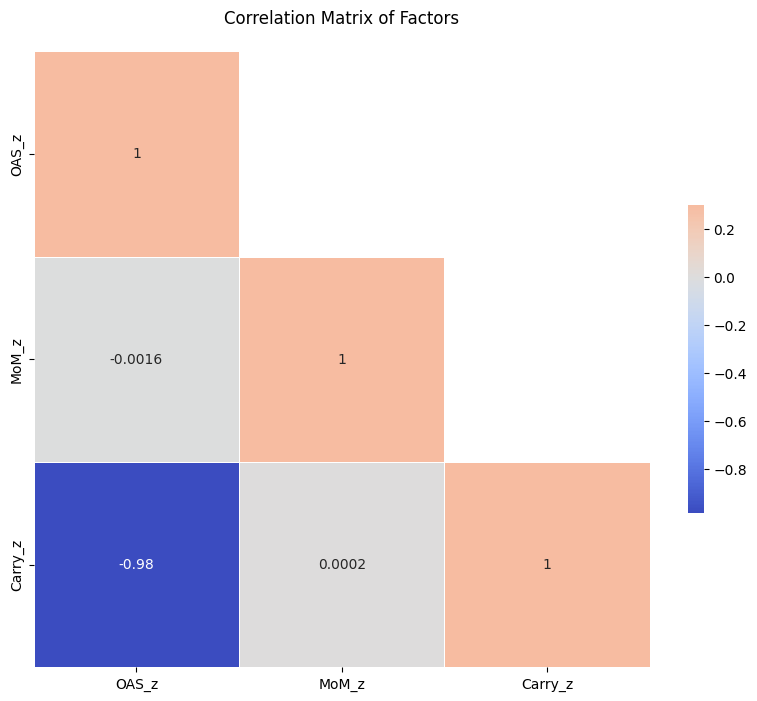

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add title if needed
plt.title('Correlation Matrix of Factors', pad=20)

plt.show()

In [ ]:
# According to score, we rank different bonds
combined_df['Rank'] = combined_df.groupby('Date')['Score'].rank(ascending=False)
rank_sum = combined_df.groupby('Order')['Rank'].sum()
portfolio_size = int(0.1 * len(combined_df['Order'].unique()))
portfolio_size

98

In [ ]:
combined_df['Total_Rank'] = combined_df['Order'].map(rank_sum)
main_df = combined_df[['Ticker','Date', 'Total_Rank']].copy()

main_df

,Ticker,Ticker,Date,Total_Rank
0,LNGFOR 3 3/8 04/13/27,LNGFOR 3 3/8 04/13/27,2020-04-30,98.0
1,UBS 7 PERP,HASI 3 3/4 09/15/30_02,2020-04-30,22610.0
2,DB 4.789 PERP,PRUPAR 7 1/2 12/31/31_02,2020-04-30,2698.0
3,LNGFOR 3.95 09/16/29,ET 6 3/4 PERP,2020-04-30,166.0
4,WDC 4 3/4 02/15/26,TXT Float 02/15/42_02,2020-04-30,6883.0
...,...,...,...,...
32566,F 3.45 02/20/25,TGNA 4 5/8 03/15/28,2022-12-31,10775.0
32567,M 6.9 01/15/32_04,ACI 3 1/4 03/15/26,2022-12-31,1127.0
32568,M 8 3/4 05/15/29_04,USIM 5 7/8 07/18/26_02,2022-12-31,12827.0
32569,SUN 5 7/8 03/15/28_03,TWX 6 5/8 05/15/29,2022-12-31,18099.0


In [ ]:
#selected_rows = df_total_r
#selected_rows = selected_rows[['Total Return', 'Excess Return']].reset_index()
main_df['Total Return'] = df_total_r['Total Return'].reset_index(drop = True)
main_df['Excess Return'] = df_excess_return.loc[2961: ,'Excess Return'].reset_index(drop = True)

main_df

,Ticker,Ticker,Date,Total_Rank,Total Return,Excess Return
0,LNGFOR 3 3/8 04/13/27,LNGFOR 3 3/8 04/13/27,2020-04-30,98.0,0.024764,0.021489
1,UBS 7 PERP,HASI 3 3/4 09/15/30_02,2020-04-30,22610.0,0.008604,0.005329
2,DB 4.789 PERP,PRUPAR 7 1/2 12/31/31_02,2020-04-30,2698.0,0.019551,0.016276
3,LNGFOR 3.95 09/16/29,ET 6 3/4 PERP,2020-04-30,166.0,0.041604,0.038330
4,WDC 4 3/4 02/15/26,TXT Float 02/15/42_02,2020-04-30,6883.0,0.027426,0.024151
...,...,...,...,...,...,...
32566,F 3.45 02/20/25,TGNA 4 5/8 03/15/28,2022-12-31,10775.0,0.014860,-0.020951
32567,M 6.9 01/15/32_04,ACI 3 1/4 03/15/26,2022-12-31,1127.0,0.016272,-0.019539
32568,M 8 3/4 05/15/29_04,USIM 5 7/8 07/18/26_02,2022-12-31,12827.0,0.052096,0.016285
32569,SUN 5 7/8 03/15/28_03,TWX 6 5/8 05/15/29,2022-12-31,18099.0,0.038729,0.002918


In [ ]:
def assign_quintiles(df):
    df['Quintile'] = pd.qcut(df['Total_Rank'], 5, labels=False)  # Quintiles 0 to 4
    quintile_dummies = pd.get_dummies(df['Quintile'], prefix='Quintile')
    quintile_dummies.columns = [col.split(".")[0] for col in quintile_dummies.columns]
    return pd.concat([df, quintile_dummies.astype(int)], axis=1)

Multi_factor = main_df.groupby('Date').apply(assign_quintiles)
Multi_factor

<ipython-input-226-6631f3406e2b>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Multi_factor = main_df.groupby('Date').apply(assign_quintiles)


,Ticker,Ticker,Date,Total_Rank,Total Return,Excess Return,Quintile,Quintile_0,Quintile_1,Quintile_2,Quintile_3,Quintile_4
0,LNGFOR 3 3/8 04/13/27,LNGFOR 3 3/8 04/13/27,2020-04-30,98.0,0.024764,0.021489,0,1,0,0,0,0
1,UBS 7 PERP,HASI 3 3/4 09/15/30_02,2020-04-30,22610.0,0.008604,0.005329,3,0,0,0,1,0
2,DB 4.789 PERP,PRUPAR 7 1/2 12/31/31_02,2020-04-30,2698.0,0.019551,0.016276,0,1,0,0,0,0
3,LNGFOR 3.95 09/16/29,ET 6 3/4 PERP,2020-04-30,166.0,0.041604,0.038330,0,1,0,0,0,0
4,WDC 4 3/4 02/15/26,TXT Float 02/15/42_02,2020-04-30,6883.0,0.027426,0.024151,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32566,F 3.45 02/20/25,TGNA 4 5/8 03/15/28,2022-12-31,10775.0,0.014860,-0.020951,1,0,1,0,0,0
32567,M 6.9 01/15/32_04,ACI 3 1/4 03/15/26,2022-12-31,1127.0,0.016272,-0.019539,0,1,0,0,0,0
32568,M 8 3/4 05/15/29_04,USIM 5 7/8 07/18/26_02,2022-12-31,12827.0,0.052096,0.016285,1,0,1,0,0,0
32569,SUN 5 7/8 03/15/28_03,TWX 6 5/8 05/15/29,2022-12-31,18099.0,0.038729,0.002918,2,0,0,1,0,0


In [ ]:
def cal_portfolio_Multi(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Total Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)

# Apply the function to each group and combine the results

portfolio_Multi = Multi_factor.groupby('Date').apply(cal_portfolio_Multi)
portfolio_Multi.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-04-30,0.032214,0.050801,0.058580,0.035560,0.035207
2020-05-31,0.032521,0.028737,0.028596,0.023470,0.016276
2020-06-30,0.021875,0.042016,0.054115,0.049008,0.032238
2020-07-31,0.015880,0.018727,0.005700,0.004436,0.004226
2020-08-31,-0.014140,-0.009014,-0.018088,-0.017821,-0.013166


In [ ]:
cum_Multip_return = (1+portfolio_Multi).cumprod()-1
cum_Multip_return.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-04-30,0.032214,0.050801,0.058580,0.035560,0.035207
2020-05-31,0.065782,0.080999,0.088852,0.059865,0.052056
2020-06-30,0.089096,0.126418,0.147775,0.111807,0.085972
2020-07-31,0.106391,0.147513,0.154317,0.116738,0.090562
2020-08-31,0.090746,0.137170,0.133438,0.096837,0.076204


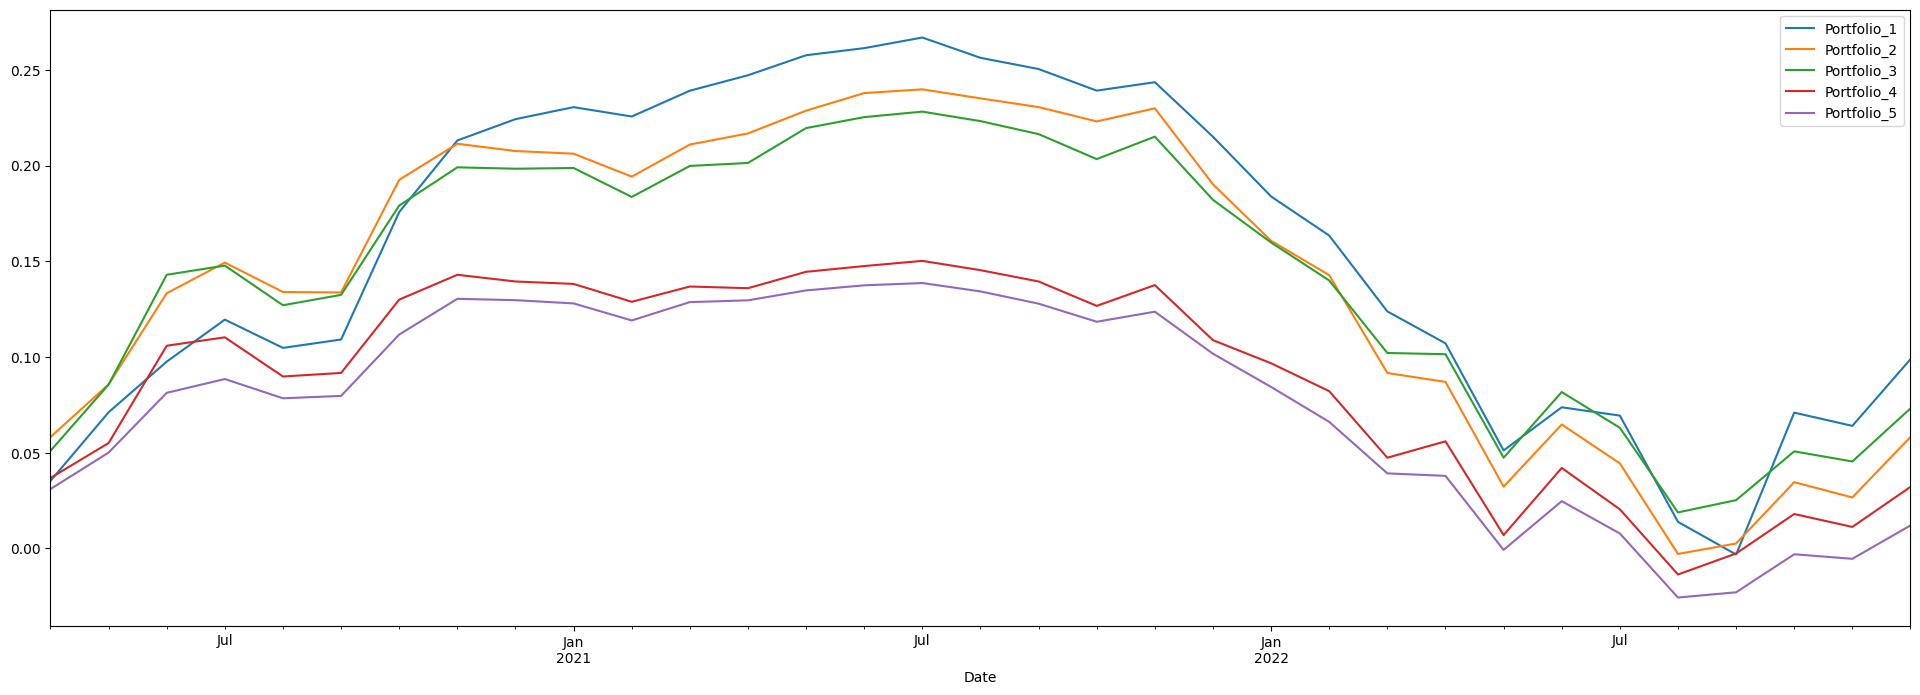

In [ ]:
cum_Multip_return.plot(figsize=(24,8))

plt.show()

In [ ]:
def cal_Multiportfolio_ex_r(df):
    # Initialize a dictionary to hold our portfolio returns
    p_return = {}
    for i in np.arange(0, 5):
        # Calculate the return for the current quintile if the sum is not zero
        quintile_sum = df['Quintile_' + str(i)].sum()
        if quintile_sum != 0:
            p_return['Portfolio_' + str(i+1)] = np.sum(df['Quintile_' + str(i)] * df['Excess Return']) / quintile_sum
        else:
            # If the sum is 0, we cannot calculate a meaningful return so we set it as NaN
            p_return['Portfolio_' + str(i+1)] = np.nan

    # Convert the dictionary to a DataFrame
    return pd.Series(p_return)


portfolio_Multiexcess_returns = Multi_factor.groupby('Date').apply(cal_Multiportfolio_ex_r)
portfolio_Multiexcess_returns.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5
Date,,,,,
2020-04-30,0.028939,0.047527,0.055305,0.032285,0.031932
2020-05-31,0.032094,0.028311,0.028170,0.023044,0.015850
2020-06-30,0.013334,0.033475,0.045573,0.040466,0.023697
2020-07-31,0.025578,0.028425,0.015398,0.014134,0.013925
2020-08-31,-0.017418,-0.012291,-0.021366,-0.021098,-0.016443


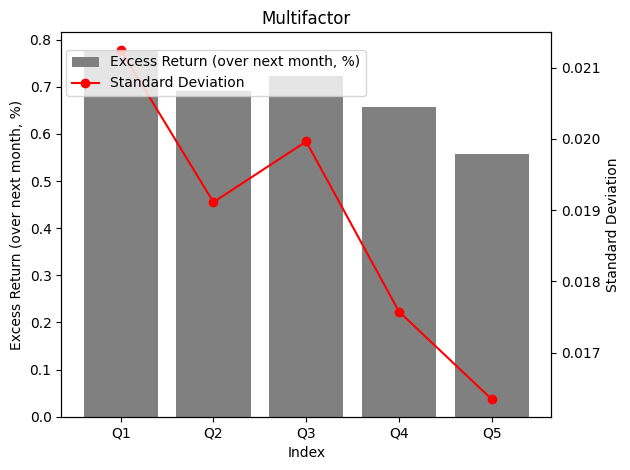

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
quintiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
excess_returns = portfolio_Multiexcess_returns.mean()*100 # Example data for excess returns
standard_deviations =  (portfolio_Multiexcess_returns).std()# Example data for standard deviation

fig, ax1 = plt.subplots()

# Bar chart for excess returns
ax1.bar(quintiles, excess_returns, color='grey', label='Excess Return (over next month, %)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Excess Return (over next month, %)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a twin axis for the standard deviation
ax2 = ax1.twinx()
ax2.plot(quintiles, standard_deviations, color='red', marker='o', label='Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
plt.title('Multifactor')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [ ]:
calculate_maximum_drawdown(portfolio_Multiexcess_returns)

-1.8558222676030374

# Including Transaction Cost

In [ ]:
transaction_cost_HY = (31.01 +54.26+ 44.22 + 58.62 + 54.65 +73.65)/12
cost = transaction_cost_HY*0.01/100
cost

0.0026367500000000006

# Summary stats



In [ ]:

summary = pd.concat([regressors.iloc[:, :3], regressors.iloc[:, -2:]], axis=1)

# Convert all data to numeric where possible, coercing errors to NaN
numeric_cols = ['OAS', 'Ratings', 'Ind Sector']
summary[numeric_cols] = summary[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the summary statistics
summary_stats = summary.describe(percentiles=[.25, .5, .75])
summary_stats = summary_stats.T

# Rename the columns to match the exhibit's format
summary_stats.rename(columns={'min': 'min',
                              '25%': '1st Q',
                              '50%': 'Median',
                              'mean': 'Mean',
                              '75%': '3rd Q',
                              'max': 'max'}, inplace=True)

summary_stats

,count,Mean,std,min,1st Q,Median,3rd Q,max
OAS,32571.0,2.931333,6.048504,-16.941996,1.72037,2.386462,3.451238,199.130583
Ratings,32571.0,6.085106,3.752915,0.000000,5.00000,5.000000,10.000000,14.000000
Ind Sector,32571.0,4.241135,2.558101,0.000000,2.00000,5.000000,6.000000,9.000000


In [ ]:
# Make sure the 'Date' columns are in the same date format if they are not already
df_total_return['Date'] = pd.to_datetime(df_total_return['Date'])
df_excess_return['Date'] = pd.to_datetime(df_excess_return['Date'])

# Now, merge the two dataframes on 'Ticker' and 'Date'
T_E_return = pd.merge(df_total_return, df_excess_return, on=['Ticker', 'Date'], how='inner')

# Calculate summary statistics for T_E_return dataframe
T_E_return_stats = T_E_return.describe().transpose()

# Rename the columns to match the existing summary_stats dataframe
T_E_return_stats = T_E_return_stats.rename(columns={
    '25%': '1st Q', '50%': 'Median', '75%': '3rd Q', 'mean': 'Mean', 'std': 'std'
})

T_E_return_stats

,count,Mean,std,min,1st Q,Median,3rd Q,max
Total Return,35532.0,-0.001565,0.060259,-0.711437,-0.015872,-0.000419,0.014510,2.524088
Excess Return,35532.0,0.001028,0.062652,-0.705052,-0.013552,0.003769,0.021102,2.487965


In [ ]:
# Make sure the column order in total_return_stats_custom matches summary_stats
column_order = ['count', 'Mean', 'std', 'min', '1st Q', 'Median', '3rd Q', 'max']
T_E_return_stats = T_E_return_stats[column_order]

# Now append total_return_stats_custom to summary_stats
# As of pandas v1.0.0, DataFrame.append is deprecated, you should use pd.concat instead.
summary_stats = pd.concat([summary_stats, T_E_return_stats])
numerical_columns = summary_stats.select_dtypes(include=['float64', 'int64']).columns
summary_stats[numerical_columns] = summary_stats[numerical_columns].round(4)
summary_stats = summary_stats.drop(columns=['count'])

summary_stats

,Mean,std,min,1st Q,Median,3rd Q,max
OAS,2.9313,6.0485,-16.9420,1.7204,2.3865,3.4512,199.1306
Ratings,6.0851,3.7529,0.0000,5.0000,5.0000,10.0000,14.0000
Ind Sector,4.2411,2.5581,0.0000,2.0000,5.0000,6.0000,9.0000
Total Return,-0.0016,0.0603,-0.7114,-0.0159,-0.0004,0.0145,2.5241
Excess Return,0.0010,0.0627,-0.7051,-0.0136,0.0038,0.0211,2.4880
